In [5]:
pip install wordcloud

     |████████████████████████████████| 173 kB 5.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import nltk
import unicodedata
import re
from nltk.corpus import stopwords
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
aus = pd.read_csv("D:\\Sinophobia Sentiment Analysis\\NewFiltering\\Result\\Aus.csv") # These are the csv files of corresponding countries tweets and their predicted sentiments
ind = pd.read_csv("D:\\Sinophobia Sentiment Analysis\\NewFiltering\\Result\\In.csv")
indo = pd.read_csv("D:\\Sinophobia Sentiment Analysis\\NewFiltering\\Result\\Indo.csv")
jap = pd.read_csv("D:\\Sinophobia Sentiment Analysis\\NewFiltering\\Result\\Jap.csv")
br = pd.read_csv("D:\\Sinophobia Sentiment Analysis\\NewFiltering\\Result\\Br.csv")
uk = pd.read_csv("D:\\Sinophobia Sentiment Analysis\\NewFiltering\\Result\\UK.csv")

In [3]:
aus['country'] = 'Australia'
ind['country'] = 'India'
indo['country'] = 'Indonesia'
jap['country'] = 'Japan'
br['country'] = 'Brazil'
uk['country'] = 'UK'

In [4]:
aus.columns

Index(['Unnamed: 0', 'Tweet', 'text', 'date', 'Optimistic', 'Thankful',
       'Empathetic', 'Pessimistic', 'Anxious', 'Sad', 'Annoyed', 'Denial',
       'Official report', 'Joking', 'country'],
      dtype='object')

In [5]:
ind = ind.drop(columns=['Unnamed: 0'],axis=1)
indo = indo.drop(columns=['Unnamed: 0'],axis=1)
aus = aus.drop(columns=['Unnamed: 0'],axis=1)
jap = jap.drop(columns=['Unnamed: 0'],axis=1)
br = br.drop(columns=['Unnamed: 0'],axis=1)
uk = uk.drop(columns=['Unnamed: 0'],axis=1)

In [6]:
df1 = pd.concat([aus,ind], axis=0)
df2 = pd.concat([df1,indo], axis=0)
df3 = pd.concat([df2,br], axis=0)
df4 = pd.concat([df3,jap], axis=0)
Combined_data = pd.concat([df4,uk], axis=0)

In [7]:
Combined_data = Combined_data.reset_index()
Combined_data

index                                              Tweet  \
0          0  china’s  yuan advanced to the strongest level ...   
1          1  retweet  physician’s agency funded china’s bat...   
2          2   and yet china has yet to apologise for this f...   
3          3  bbc news   coronavirus  vaccines should work a...   
4          4  these mf rs want to lecture china on human rig...   
...      ...                                                ...   
95133  48320         only one product that made in chinazi i...   
95134  48321  a very comforting news  we need to get this  c...   
95135  48322  retweet  a very comforting news  we need to ge...   
95136  48323  while  chinazi is sitting back after the mess ...   
95137  48324  retweet  while  chinazi is sitting back after ...   

                                                    text  \
0      China’s #yuan advanced to the strongest level ...   
1      RT @jsolomonReports: Fauci’s agency funded Chi...   
2      @globaltimesnews And yet China has yet to apol...   
3      BBC News - Covid: Vaccines should work against...   
4      These MF'rs want to lecture China on human rig...   
...                                                  ...   
95133  @eynewil_h @KTCsmile_2 @WumaoLs @Anjilaming @t...   
95134  A Very Comforting News. We need to get this #C...   
95135  RT @reachind_uk: A Very Comforting News. We ne...   
95136  While #Chinazi is sitting back after the mess ...   
95137  RT @reachind_uk: While #Chinazi is sitting bac...   

                                 date  Optimistic  Thankful  Empathetic  \
0      Wed Dec 08 04:26:39 +0000 2021           0         0           0   
1      Wed Dec 08 04:30:07 +0000 2021           0         0           0   
2      Wed Dec 08 04:49:55 +0000 2021           0         0           0   
3      Wed Dec 08 04:56:32 +0000 2021           0         0           0   
4      Wed Dec 08 05:07:41 +0000 2021           0         0           0   
...                               ...         ...       ...         ...   
95133  Mon Oct 11 18:16:17 +0000 2021           0         0           0   
95134             1317074587943919619           1         0           0   
95135             1317083005551284224           1         0           0   
95136             1313034750370689024           1         1           0   
95137             1313035607736815617           1         0           0   

       Pessimistic  Anxious  Sad  Annoyed  Denial  Official report  Joking  \
0                0        0    0        0       0                1       0   
1                0        0    0        0       1                1       0   
2                0        0    0        1       1                0       0   
3                0        0    0        1       1                0       0   
4                0        0    0        1       1                0       0   
...            ...      ...  ...      ...     ...              ...     ...   
95133            0        0    0        1       0                0       0   
95134            0        0    0        0       0                0       0   
95135            0        0    0        0       0                0       0   
95136            0        0    0        1       0                0       0   
95137            0        0    0        1       0                0       0   

         country  
0      Australia  
1      Australia  
2      Australia  
3      Australia  
4      Australia  
...          ...  
95133         UK  
95134         UK  
95135         UK  
95136         UK  
95137         UK  

[95138 rows x 15 columns]

In [8]:
Combined_data = Combined_data.drop(columns=['index'],axis=1)

In [9]:
data = Combined_data.copy()

In [10]:
data['date'] = pd.to_datetime(data['date'], format='%a %b %d %H:%M:%S +0000 %Y',errors='coerce')
#data = data.dropna(subset=['date'])
data['date'] = data['date'].dt.tz_localize('UTC').dt.tz_convert(None)
data['month'] = pd.to_datetime(data['date']).dt.strftime('%Y-%m')

In [11]:
dates = data['month'].unique()
df = data.copy()
dates

array(['2021-12', '2022-01', '2021-11', '2021-09', '2021-08', '2021-10',
       '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07',
       nan, '2020-10', '2020-12', '2021-01', '2020-04', '2020-05',
       '2020-06', '2020-07', '2020-08'], dtype=object)

In [12]:
data.columns

Index(['Tweet', 'text', 'date', 'Optimistic', 'Thankful', 'Empathetic',
       'Pessimistic', 'Anxious', 'Sad', 'Annoyed', 'Denial', 'Official report',
       'Joking', 'country', 'month'],
      dtype='object')

In [13]:
data

Tweet  \
0      china’s  yuan advanced to the strongest level ...   
1      retweet  physician’s agency funded china’s bat...   
2       and yet china has yet to apologise for this f...   
3      bbc news   coronavirus  vaccines should work a...   
4      these mf rs want to lecture china on human rig...   
...                                                  ...   
95133         only one product that made in chinazi i...   
95134  a very comforting news  we need to get this  c...   
95135  retweet  a very comforting news  we need to ge...   
95136  while  chinazi is sitting back after the mess ...   
95137  retweet  while  chinazi is sitting back after ...   

                                                    text                date  \
0      China’s #yuan advanced to the strongest level ... 2021-12-08 04:26:39   
1      RT @jsolomonReports: Fauci’s agency funded Chi... 2021-12-08 04:30:07   
2      @globaltimesnews And yet China has yet to apol... 2021-12-08 04:49:55   
3      BBC News - Covid: Vaccines should work against... 2021-12-08 04:56:32   
4      These MF'rs want to lecture China on human rig... 2021-12-08 05:07:41   
...                                                  ...                 ...   
95133  @eynewil_h @KTCsmile_2 @WumaoLs @Anjilaming @t... 2021-10-11 18:16:17   
95134  A Very Comforting News. We need to get this #C...                 NaT   
95135  RT @reachind_uk: A Very Comforting News. We ne...                 NaT   
95136  While #Chinazi is sitting back after the mess ...                 NaT   
95137  RT @reachind_uk: While #Chinazi is sitting bac...                 NaT   

       Optimistic  Thankful  Empathetic  Pessimistic  Anxious  Sad  Annoyed  \
0               0         0           0            0        0    0        0   
1               0         0           0            0        0    0        0   
2               0         0           0            0        0    0        1   
3               0         0           0            0        0    0        1   
4               0         0           0            0        0    0        1   
...           ...       ...         ...          ...      ...  ...      ...   
95133           0         0           0            0        0    0        1   
95134           1         0           0            0        0    0        0   
95135           1         0           0            0        0    0        0   
95136           1         1           0            0        0    0        1   
95137           1         0           0            0        0    0        1   

       Denial  Official report  Joking    country    month  
0           0                1       0  Australia  2021-12  
1           1                1       0  Australia  2021-12  
2           1                0       0  Australia  2021-12  
3           1                0       0  Australia  2021-12  
4           1                0       0  Australia  2021-12  
...       ...              ...     ...        ...      ...  
95133       0                0       0         UK  2021-10  
95134       0                0       0         UK      NaN  
95135       0                0       0         UK      NaN  
95136       0                0       0         UK      NaN  
95137       0                0       0         UK      NaN  

[95138 rows x 15 columns]

In [14]:
data.to_csv("D:\\Sinophobia Sentiment Analysis\\Combined_data.csv")

In [45]:
Aus = pd.read_csv("D:\\Sinophobia Sentiment Analysis\\archive\\Tweets_Australia\\Tweets_Australia.csv",low_memory=False)

In [46]:
Br = pd.read_csv("D:\\Sinophobia Sentiment Analysis\\archive\\Tweets_Brazil\\Tweets_Brazil.csv", low_memory=False)

In [47]:
In = pd.read_csv("D:\\Sinophobia Sentiment Analysis\\archive\\Tweets_India\\Tweets_India\\India.csv", low_memory=False)

In [48]:
Ind = pd.read_csv("D:\\Sinophobia Sentiment Analysis\\archive\\Tweets_Indonesia\\Tweets_Indonesia.csv", low_memory=False)

In [49]:
Jap = pd.read_csv("D:\\Sinophobia Sentiment Analysis\\archive\\Tweets_Japan\\Tweets_Japan.csv", low_memory=False)

In [44]:
UK = pd.read_csv("D:\\Sinophobia Sentiment Analysis\\archive\\Tweets_UK\\Tweets_UK.csv", low_memory=False)

In [50]:
Aus['country'] = 'Australia'
In['country'] = 'India'
Ind['country'] = 'Indonesia'
Jap['country'] = 'Japan'
Br['country'] = 'Brazil'
UK['country'] = 'UK'

In [51]:
df1 = pd.concat([Aus,In], axis=0)
df2 = pd.concat([df1,Ind], axis=0)
df3 = pd.concat([df2,Br], axis=0)
df4 = pd.concat([df3,Jap], axis=0)
Original_data = pd.concat([df4,UK], axis=0)

In [53]:
Original_data['date'] = pd.to_datetime(Original_data['created_at'], format='%a %b %d %H:%M:%S +0000 %Y',errors='coerce')
#Original_data = Original_data.dropna(subset=['date'])
Original_data['date'] = Original_data['date'].dt.tz_localize('UTC').dt.tz_convert(None)
Original_data['month'] = pd.to_datetime(Original_data['date']).dt.strftime('%Y-%m')

In [91]:
Original_data

Unnamed: 0                      created_at                   id  \
0                11  Wed Dec 08 04:25:46 +0000 2021  1468436616263909377   
1               229  Wed Dec 08 04:25:57 +0000 2021  1468436661633630209   
2               236  Wed Dec 08 04:26:06 +0000 2021  1468436701043314692   
3               250  Wed Dec 08 04:26:07 +0000 2021  1468436704755286020   
4               257  Wed Dec 08 04:26:07 +0000 2021  1468436706424545281   
...             ...                             ...                  ...   
16958861      91217  Fri Aug 21 22:50:50 +0000 2020  1296942867894669313   
16958862      91441  Fri Aug 21 22:50:56 +0000 2020  1296942895199649792   
16958863      91489  Fri Aug 21 22:50:58 +0000 2020  1296942901478535168   
16958864      91550  Fri Aug 21 22:50:59 +0000 2020  1296942904229888000   
16958865      91634  Fri Aug 21 22:51:02 +0000 2020  1296942920294170624   

                                                       text  \
0         RT @AaronSiriSG: Litigation update:  \n\nFDA d...   
1         RT @covidbaseau: The TGA has approved the Mode...   
2         RT @SimoLove: Federal Health Minister Greg Hun...   
3         @twityouse Are these the deniers that are wear...   
4         RT @drsimonegold: WOW: a preprint study for Th...   
...                                                     ...   
16958861  Britain could go into a SECOND national lockdo...   
16958862  @marcorandazza Do you have to wear a mask in t...   
16958863  RT @LaylaMoran: I've written to the Prime Mini...   
16958864  RT @ONS: #COVID19 was the 8th most frequent un...   
16958865  RT @LaylaMoran: Unfortunately, the Government ...   

                           user_location    country                date  \
0                          Iasi, Romania  Australia 2021-12-08 04:25:46   
1                               Canberra  Australia 2021-12-08 04:25:57   
2         Wurundjeri Richmond, Melbourne  Australia 2021-12-08 04:26:06   
3                    Victoria, Australia  Australia 2021-12-08 04:26:07   
4                               Perth WA  Australia 2021-12-08 04:26:07   
...                                  ...        ...                 ...   
16958861                      London, UK         UK 2020-08-21 22:50:50   
16958862                              UK         UK 2020-08-21 22:50:56   
16958863                  Manchester, UK         UK 2020-08-21 22:50:58   
16958864                  Colchester, UK         UK 2020-08-21 22:50:59   
16958865                  Manchester, UK         UK 2020-08-21 22:51:02   

              month  
0        2021-12-01  
1        2021-12-01  
2        2021-12-01  
3        2021-12-01  
4        2021-12-01  
...             ...  
16958861 2020-08-01  
16958862 2020-08-01  
16958863 2020-08-01  
16958864 2020-08-01  
16958865 2020-08-01  

[27400982 rows x 8 columns]

# Some stats of the whole data

### Plot to to get number of Sinophobia related tweets per country

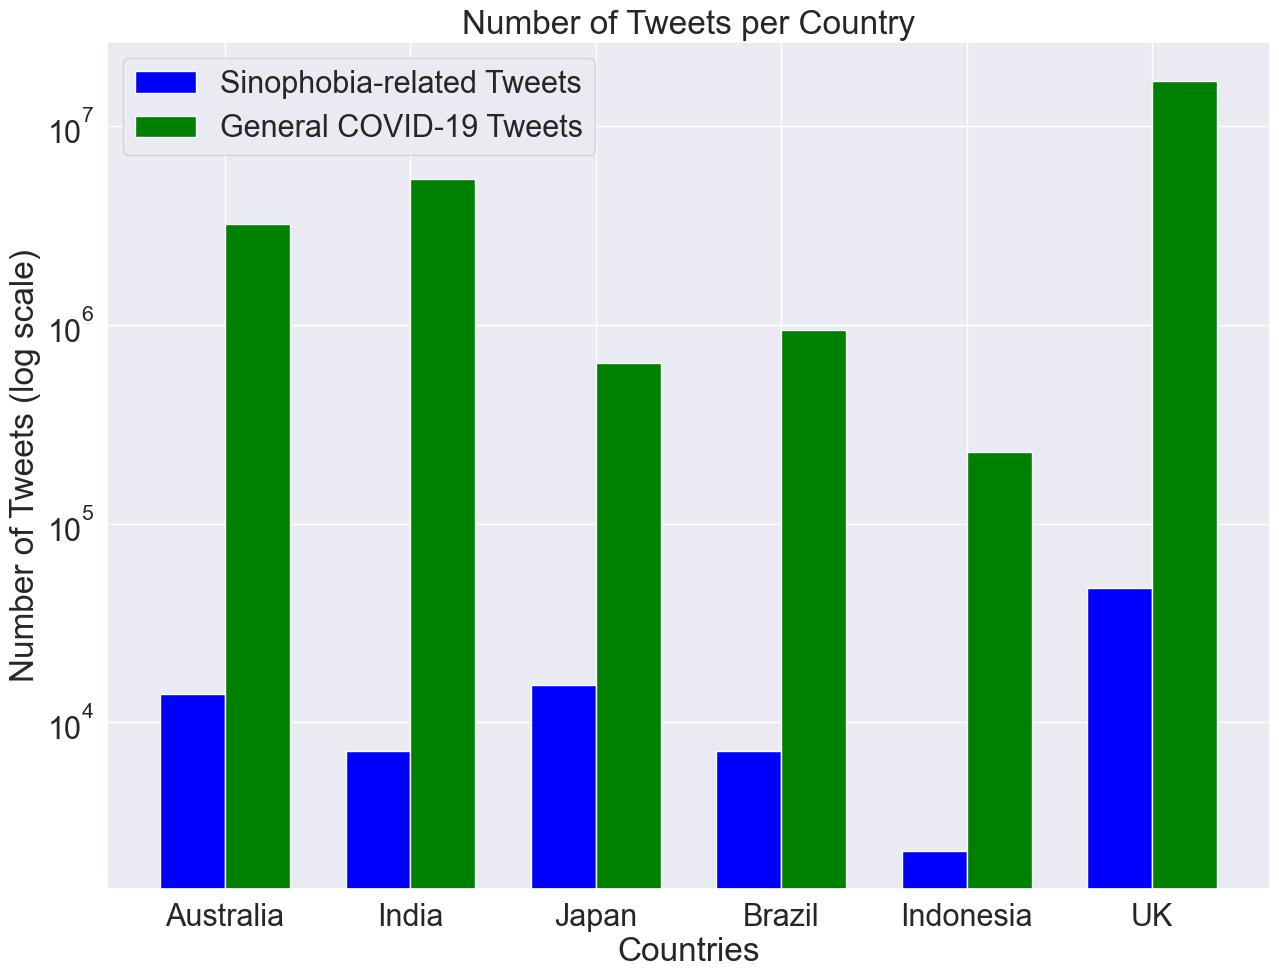

In [56]:
countries = ['Australia', 'India', 'Japan', 'Brazil', 'Indonesia', 'UK']
tweet_counts = [len(aus), len(ind), len(jap), len(br), len(indo), len(uk)]   # Tweet counts of vaccine related tweets
general_tweet_counts = [3212464, 5411294, 644510, 943913, 229935, 16958866]

bar_width = 0.35  # Width of the bars
index = np.arange(len(countries))  # The label locations

plt.figure(figsize = (15, 11))

# Plotting the bar graph

plt.bar(index, tweet_counts, bar_width, label='Sinophobia-related Tweets', color='blue')

# Plotting the bar graph for general COVID-19 tweets
plt.bar(index + bar_width, general_tweet_counts, bar_width, label='General COVID-19 Tweets', color='green')

# Customizing the graph
plt.xlabel('Countries')
plt.ylabel('Number of Tweets (log scale)')
plt.yscale('log')
plt.title('Number of Tweets per Country')
plt.xticks(index + bar_width / 2, countries)
plt.legend()

# Displaying the graph
plt.show()

### Number of Sinophobic Tweets Over Time

In [15]:
print(df.columns)

Index(['Tweet', 'text', 'date', 'Optimistic', 'Thankful', 'Empathetic',
       'Pessimistic', 'Anxious', 'Sad', 'Annoyed', 'Denial', 'Official report',
       'Joking', 'country', 'month'],
      dtype='object')


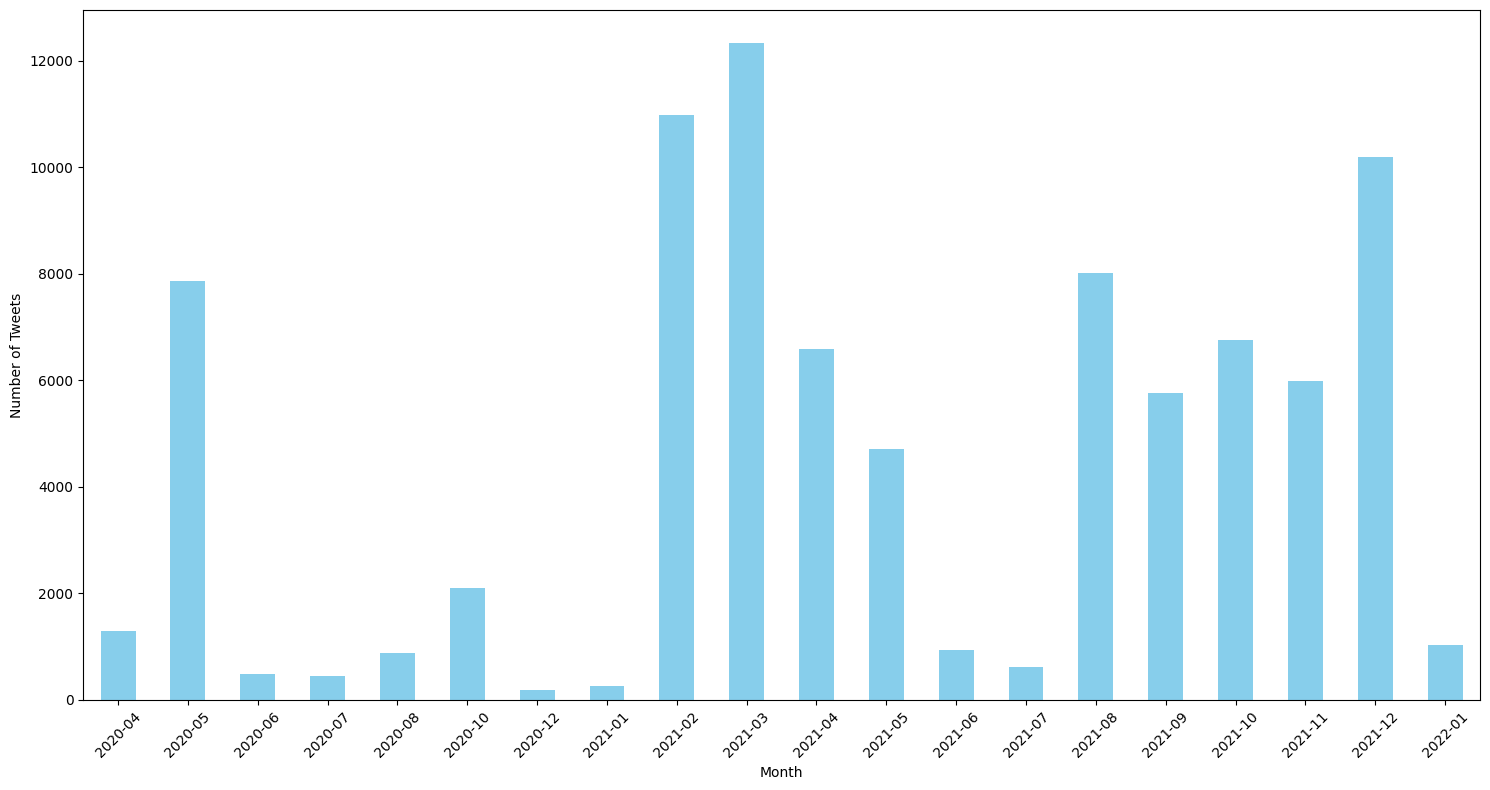

In [19]:
df['month'] = pd.to_datetime(df['month'], format='%Y-%m', errors='coerce')

# Group by 'month' and count the number of tweets
tweets_per_month = df.groupby('month').size()

# Plotting the bar graph
plt.figure(figsize=(15, 8))
tweets_per_month.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)

# Format the x-axis to show only the year and month
plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(tweets_per_month.index.strftime('%Y-%m')))

plt.tight_layout()

# Display the plot
plt.show()

### Counts of tweets that contain given sentiment

Text(0.5, 0, 'Count')

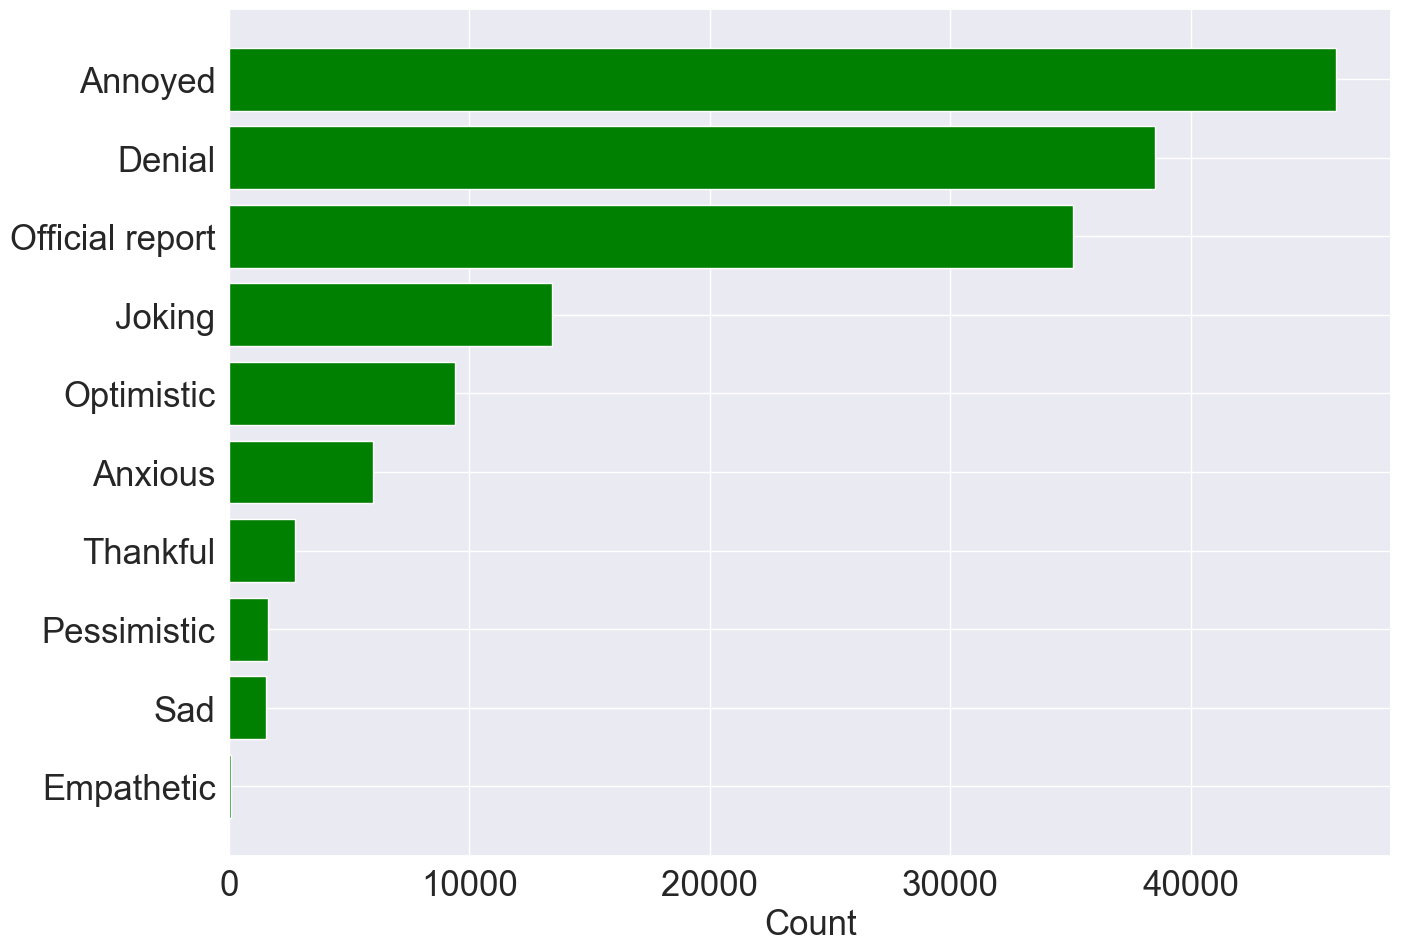

In [32]:
emotions = list(Combined_data.columns[3:13])
scores = [sum(Combined_data[x]) for x in emotions]
pairs = []

for i in range(len(emotions)):
    pairs.append((emotions[i], scores[i]))

pairs = sorted(pairs, key = lambda x : x[1], reverse = False)
emotions_sorted = []
scores_sorted = []

for pair in pairs:
    emotions_sorted.append(pair[0])
    scores_sorted.append(pair[1])

plt.figure(figsize = (15, 11))
plt.barh(emotions_sorted, scores_sorted, color = 'green')
plt.yticks(fontsize= 25)
plt.xticks(fontsize = 25)
plt.xlabel('Count', fontsize=25)


### Counts of labels of tweets

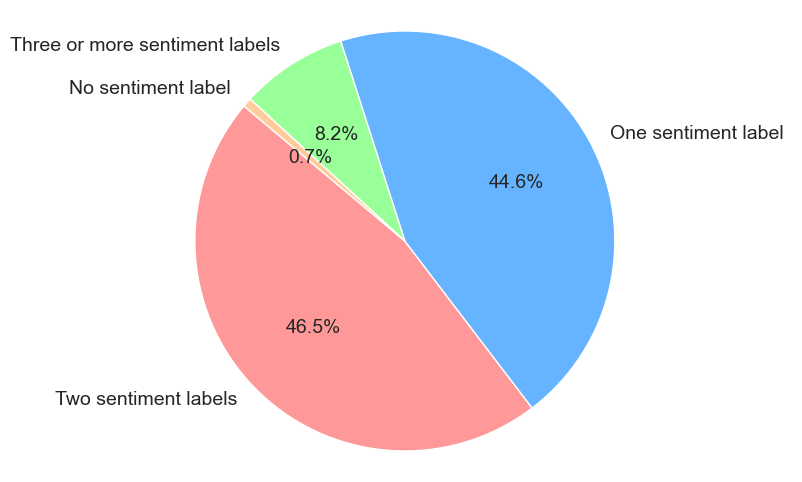

In [39]:
# Count the number of sentiment labels for each tweet
df['n_emotions'] = df[['Optimistic', 'Thankful', 'Empathetic', 'Pessimistic', 'Anxious', 'Sad', 'Annoyed', 'Denial', 'Official report', 'Joking']].sum(axis=1)

# Categorize tweets based on the number of sentiment labels
df['label_count'] = df['n_emotions'].apply(lambda x: 'No sentiment label' if x == 0 else ('One sentiment label' if x == 1 else ('Two sentiment labels' if x == 2 else 'Three or more sentiment labels')))

# Count the occurrences of each category
label_counts = df['label_count'].value_counts()

# Define the labels and their corresponding sizes
labels = label_counts.index
sizes = label_counts.values

# Define the colors for the pie chart
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Create the pie chart
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 14})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

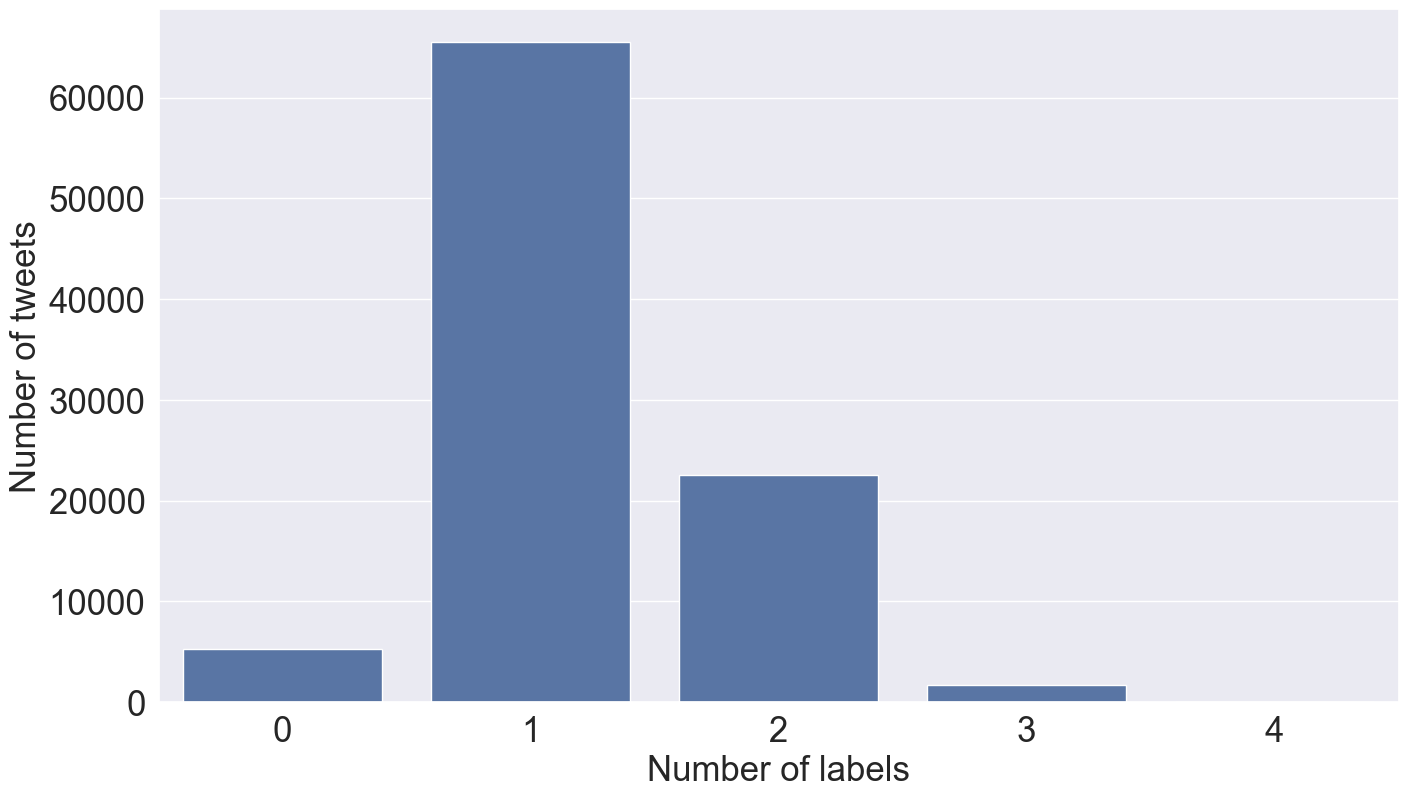

In [22]:
data['n_emotions'] = data['Optimistic'] + data['Thankful'] + data['Empathetic'] + data['Pessimistic'] + data['Anxious'] + data['Sad'] + data['Annoyed'] + \
                        data['Official report'] + data['Joking']
rowSums = data['n_emotions']
multiLabel_counts = rowSums.value_counts()

sns.set(font_scale = 2)
plt.figure(figsize = (16, 9))

ax = sns.barplot(x=multiLabel_counts.index, y=multiLabel_counts.values, orient = 'v')

#plt.title("Tweets having multiple labels")
plt.ylabel('Number of tweets', fontsize = 25)
plt.xlabel('Number of labels', fontsize = 25)
plt.yticks(fontsize= 25)
plt.xticks(fontsize = 25)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    #ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

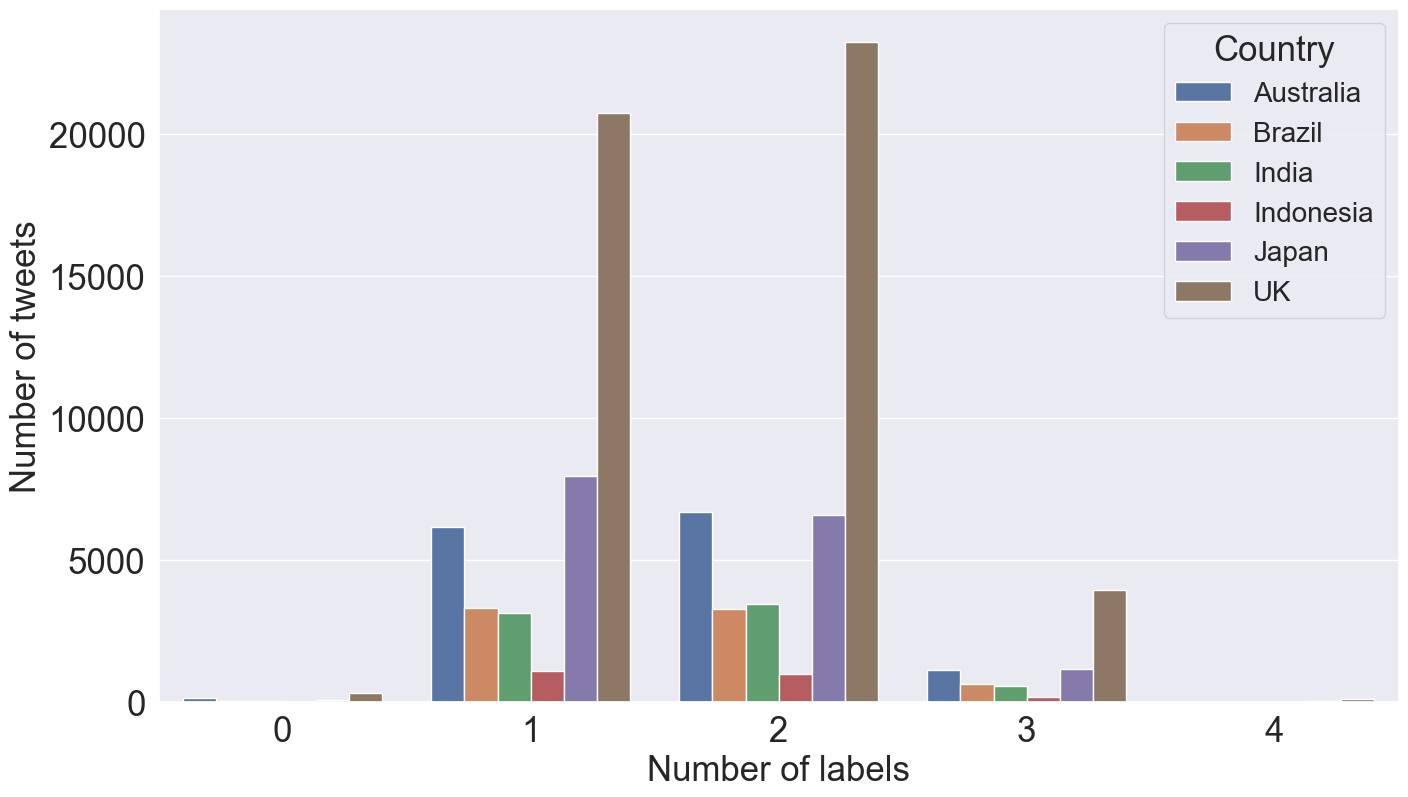

In [42]:
# Count the occurrences of each n_emotions category for each country
label_distribution = df.groupby(['n_emotions', 'country']).size().unstack(fill_value=0)

# Convert the label_distribution DataFrame to a long-form DataFrame for seaborn
label_distribution_long = label_distribution.reset_index().melt(id_vars='n_emotions', var_name='country', value_name='count')


# Plotting
sns.set(font_scale=2)
plt.figure(figsize=(16, 9))

# Create a bar plot for each country with hue
ax = sns.barplot(x='n_emotions', y='count', hue='country', data=label_distribution_long)

plt.ylabel('Number of tweets', fontsize=25)
plt.xlabel('Number of labels', fontsize=25)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)

plt.legend(title='Country', fontsize=20, title_fontsize=25)
plt.show()

### Percentage distribution of sentiments in all countries

C:\Users\无敌晨晨\AppData\Local\Temp\ipykernel_46848\2025608246.py:8: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax = sns.barplot(x='country', y='value', hue='Sentiments',data=melted_data, palette=dark_palette)


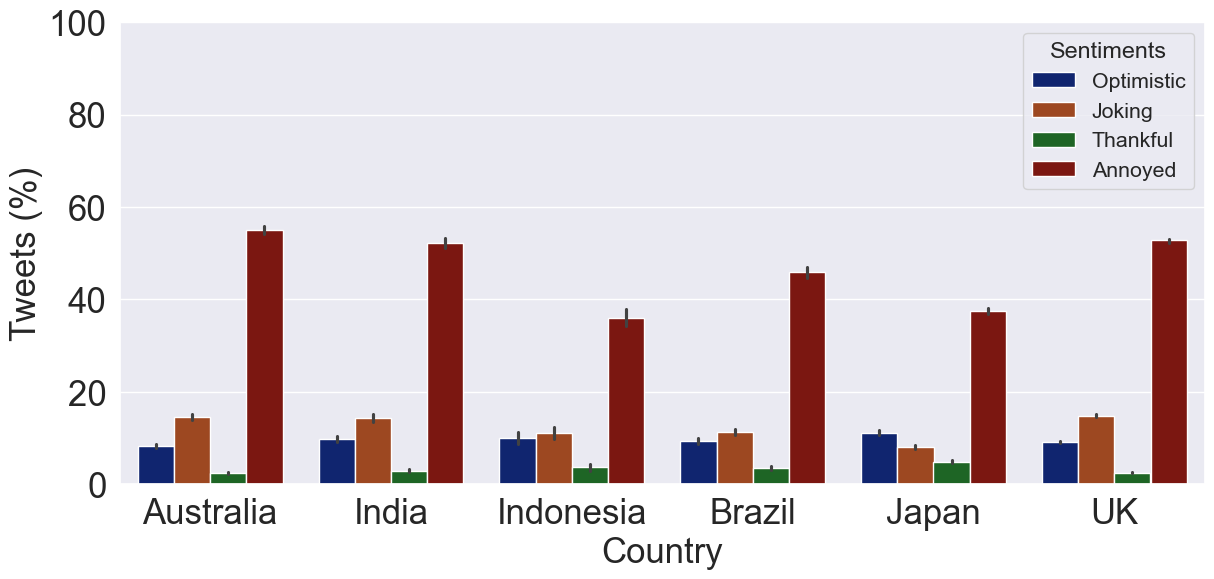

In [55]:
dark_palette = sns.color_palette("dark")

plt.figure(figsize = (14, 6))
sns.set(font_scale=1.4)
melted_data = pd.melt(data, id_vars='country', value_vars=['Optimistic', 'Joking', 'Thankful','Annoyed'])
melted_data['value'] = melted_data['value'] * 100
melted_data.rename(columns={'variable':'Sentiments'}, inplace=True)
ax = sns.barplot(x='country', y='value', hue='Sentiments',data=melted_data, palette=dark_palette)
plt.ylabel('Tweets (%)', fontsize=25)
plt.ylim(0, 100)
plt.xlabel('Country', fontsize=25)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.show()


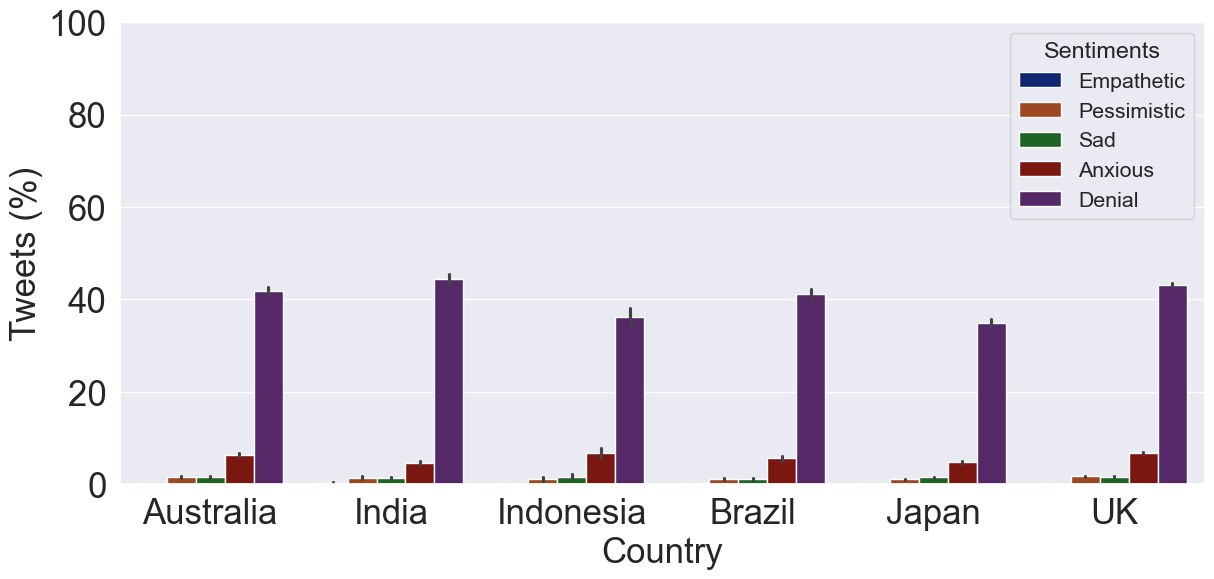

In [56]:
dark_palette_2 = sns.color_palette("dark", 5)
plt.figure(figsize = (14, 6))
sns.set(font_scale=1.4)
melted_data = pd.melt(data, id_vars='country', value_vars=['Empathetic', 'Pessimistic', 'Sad','Anxious','Denial'])
melted_data['value'] = melted_data['value'] * 100
melted_data.rename(columns={'variable':'Sentiments'}, inplace=True)
ax = sns.barplot(x='country', y='value', hue='Sentiments', data=melted_data, palette=dark_palette_2)
plt.ylabel('Tweets (%)', fontsize=25)
plt.ylim(0, 100)
plt.xlabel('Country', fontsize=25)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.show()


### Tweet counts variation over months

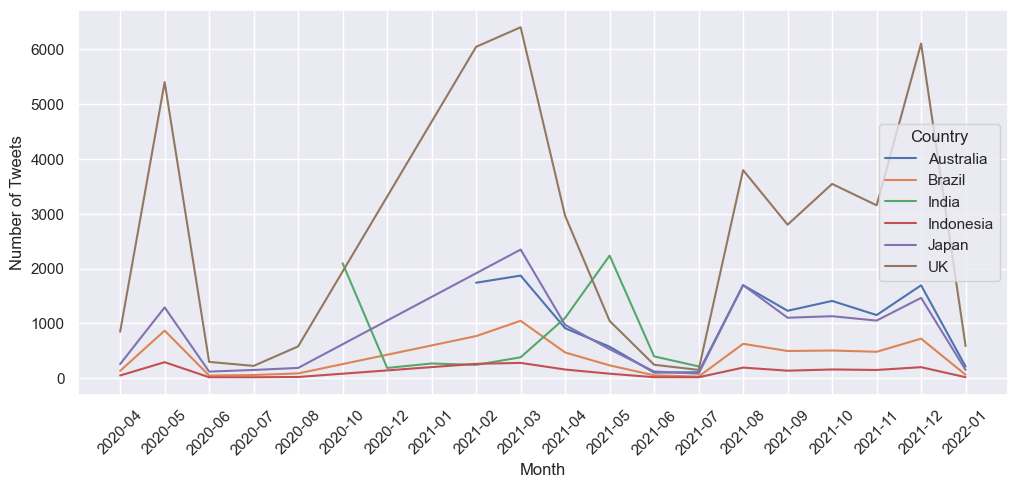

In [26]:
# Group and count the number of tweets per month and country
grouped = data.groupby(['month', 'country'])['Tweet'].count().reset_index()
grouped.columns = ['Month', 'Country', 'Number of Tweets']

# Sort the DataFrame by 'Country' to ensure alphabetical order
grouped = grouped.sort_values(by='Country')

# Ensure the months are in chronological order
grouped['Month'] = pd.Categorical(grouped['Month'], ordered=True, categories=sorted(grouped['Month'].unique()))

# Plotting with seaborn
plt.figure(figsize=(12, 5))
sns.set(style="darkgrid")
sns.lineplot(x="Month", y="Number of Tweets", hue="Country", data=grouped, hue_order=sorted(grouped['Country'].unique()))
plt.xticks(rotation=45)
plt.show()

### Monthly COVID cases

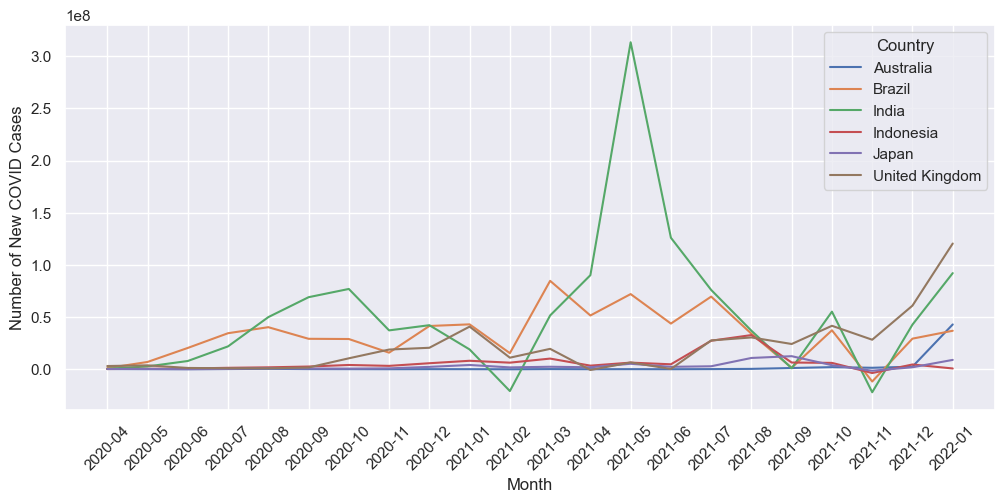

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
df = pd.read_csv(url)

# Filter for selected countries
countries = ['India', 'Australia', 'Indonesia', 'Japan', 'Brazil', 'United Kingdom']
df = df[df['Country/Region'].isin(countries)]

# Melt the dataframe to long format
df_melted = df.melt(id_vars=['Country/Region', 'Province/State', 'Lat', 'Long'], var_name='Date', value_name='Cases')

# Ensure all date strings are properly formatted
df_melted['Date'] = pd.to_datetime(df_melted['Date'], format='%m/%d/%y', errors='coerce')

# Drop rows with invalid dates
df_melted = df_melted.dropna(subset=['Date'])

# Group by date and country to get the total cases per day per country
df_grouped = df_melted.groupby(['Date', 'Country/Region'])['Cases'].sum().reset_index()

# Calculate new cases per month
df_grouped['Month'] = df_grouped['Date'].dt.to_period('M')
df_grouped = df_grouped.groupby(['Month', 'Country/Region'])['Cases'].sum().reset_index()

# Calculate monthly new cases
df_grouped['New_Cases'] = df_grouped.groupby('Country/Region')['Cases'].diff().fillna(df_grouped['Cases'])

# Filter for the date range from 2020-04 to 2022-01
start_date = '2020-04'
end_date = '2022-01'
df_grouped = df_grouped[(df_grouped['Month'] >= start_date) & (df_grouped['Month'] <= end_date)]

# Rename columns for seaborn compatibility
df_grouped = df_grouped.rename(columns={"Country/Region": "Country", "New_Cases": "New COVID Cases"})

# Convert 'Month' to string for plotting
df_grouped['Month'] = df_grouped['Month'].astype(str)

# Plot the data using seaborn
plt.figure(figsize=(12, 5))
sns.set(style="darkgrid")
sns.lineplot(x="Month", y="New COVID Cases", hue="Country", data=df_grouped)

# Customize the plot
plt.xlabel('Month')
plt.ylabel('Number of New COVID Cases')
plt.xticks(rotation=45)
plt.grid(True)

# Save the plot
plt.savefig('new_covid_cases_per_month_seaborn.png')
plt.show()



# ngrams

In [15]:
def clean(text):
    wnl = nltk.stem.WordNetLemmatizer()

    stop_words = set(stopwords.words('english'))


    extra_stop_words = []

    stop_words.update(extra_stop_words)

    text = (unicodedata.normalize('NFKD', text)
            .encode('ascii', 'ignore')
            .decode('utf-8', 'ignore')
            .lower())
    words = re.sub(r'[^\w\s]', '', text).split()

    words = [word if "'" not in word else word.split("'")[0] for word in words]
    return [wnl.lemmatize(word) for word in words if word not in stop_words]

In [16]:
def extract_specific_quarter_data(df, start_date, end_date):
    """
    Extract data from the DataFrame for the specified date range.

    Args:
    - df: DataFrame to extract data from
    - start_date: Start date of the date range (format: 'YYYY-MM-DD')
    - end_date: End date of the date range (format: 'YYYY-MM-DD')

    Returns:
    - DataFrame containing data for the specified date range
    """
    # Convert start_date and end_date to datetime objects
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)

    # Extract data for the specified date range
    return df[(df['date'] >= start_date) & (df['date'] <= end_date)]

In [17]:
def plot_ngrams_for_dataset1(data, dataset_name, start_date, end_date, n=[2], top=15, colors=('#00429d', '#ffa600')):
    # Extract data for the specified date range
    quarterly_data = extract_specific_quarter_data(data, start_date, end_date)

    # Clean the data
    quarterly_data['Tweet'] = quarterly_data['Tweet'].astype(str)
    cleaned_data = clean(''.join(quarterly_data['Tweet']))

    for i, n_val in enumerate(n):
        plt.figure(figsize=(15, 8))  
        ax = plt.subplot()  

        
        ngrams_series = pd.Series(nltk.ngrams(cleaned_data, n_val)).value_counts()[:top]
        ngrams_series.sort_values().plot.barh(color=colors[i % len(colors)], width=0.5, ax=ax)

        ax.tick_params(axis='x', labelsize=20)
        ax.tick_params(axis='y', labelsize=22, rotation=45)

        plt.show()  
        # Save the plot
        plt.savefig(f'{dataset_name}_ngrams_{n_val}grams_{start_date}_to_{end_date}.png')
        plt.close()

C:\Users\无敌晨晨\AppData\Local\Temp\ipykernel_46848\1034855968.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarterly_data['Tweet'] = quarterly_data['Tweet'].astype(str)


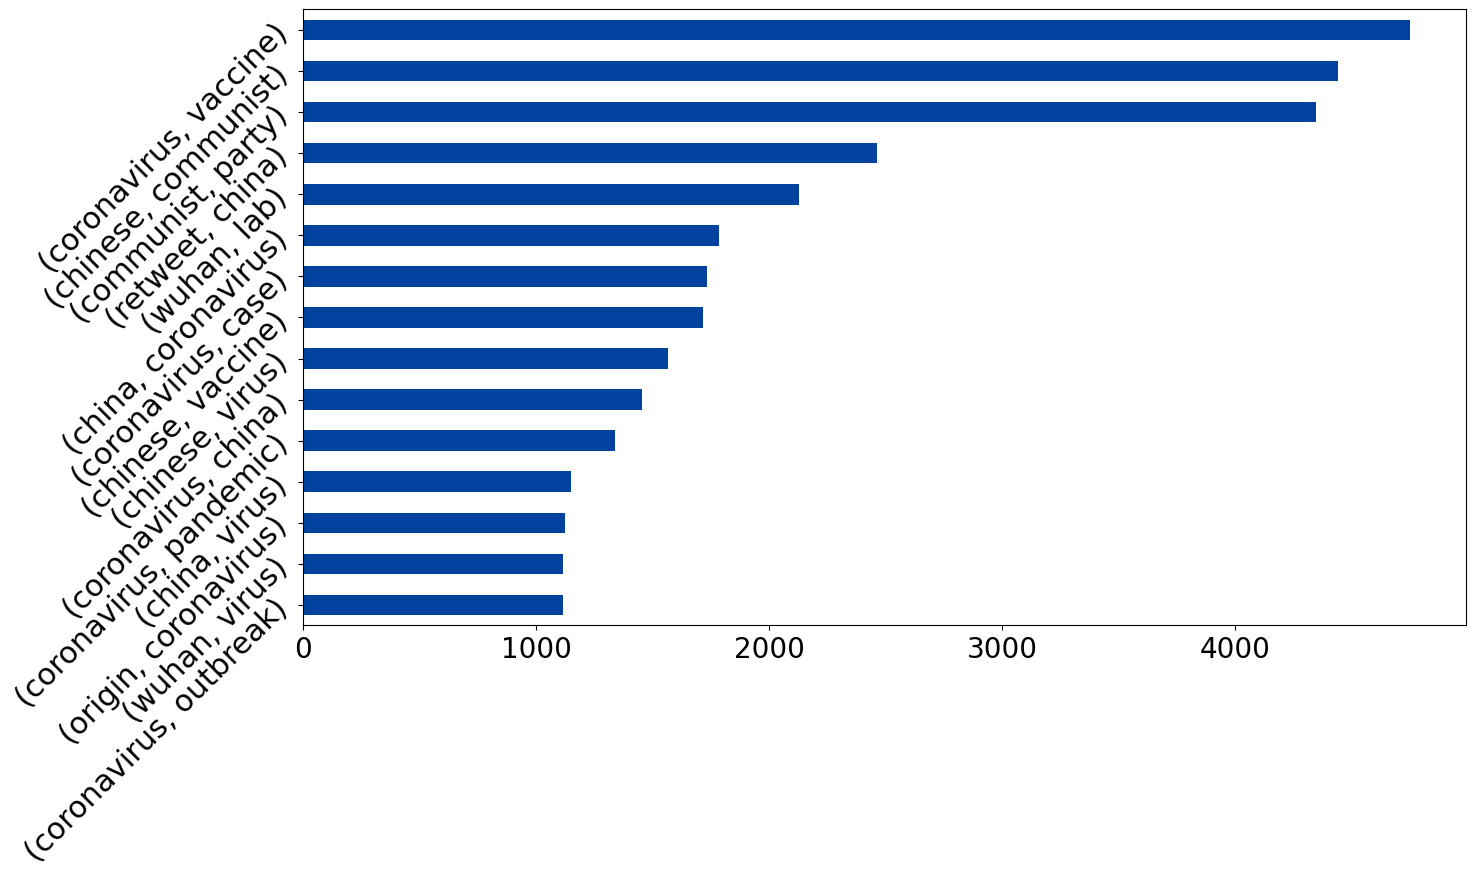

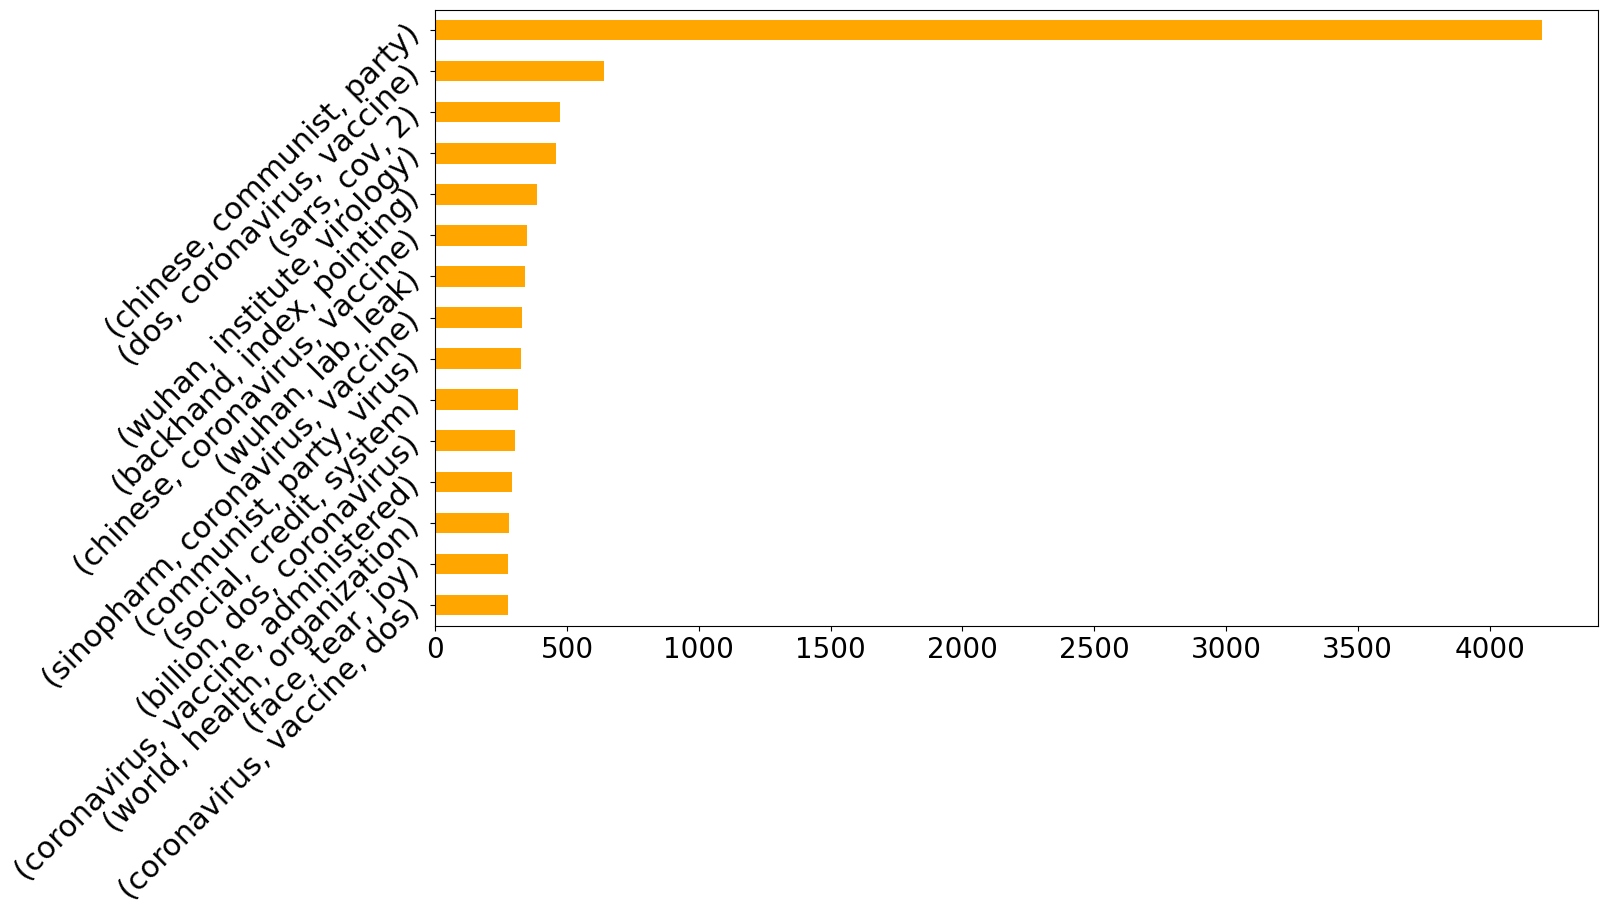

In [18]:
start_date = '2020-07-01'
end_date = '2022-04-30'
plot_ngrams_for_dataset1(df, 'Overall Dataset', start_date, end_date, n=[2, 3], top=15)

C:\Users\无敌晨晨\AppData\Local\Temp\ipykernel_46848\1034855968.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarterly_data['Tweet'] = quarterly_data['Tweet'].astype(str)


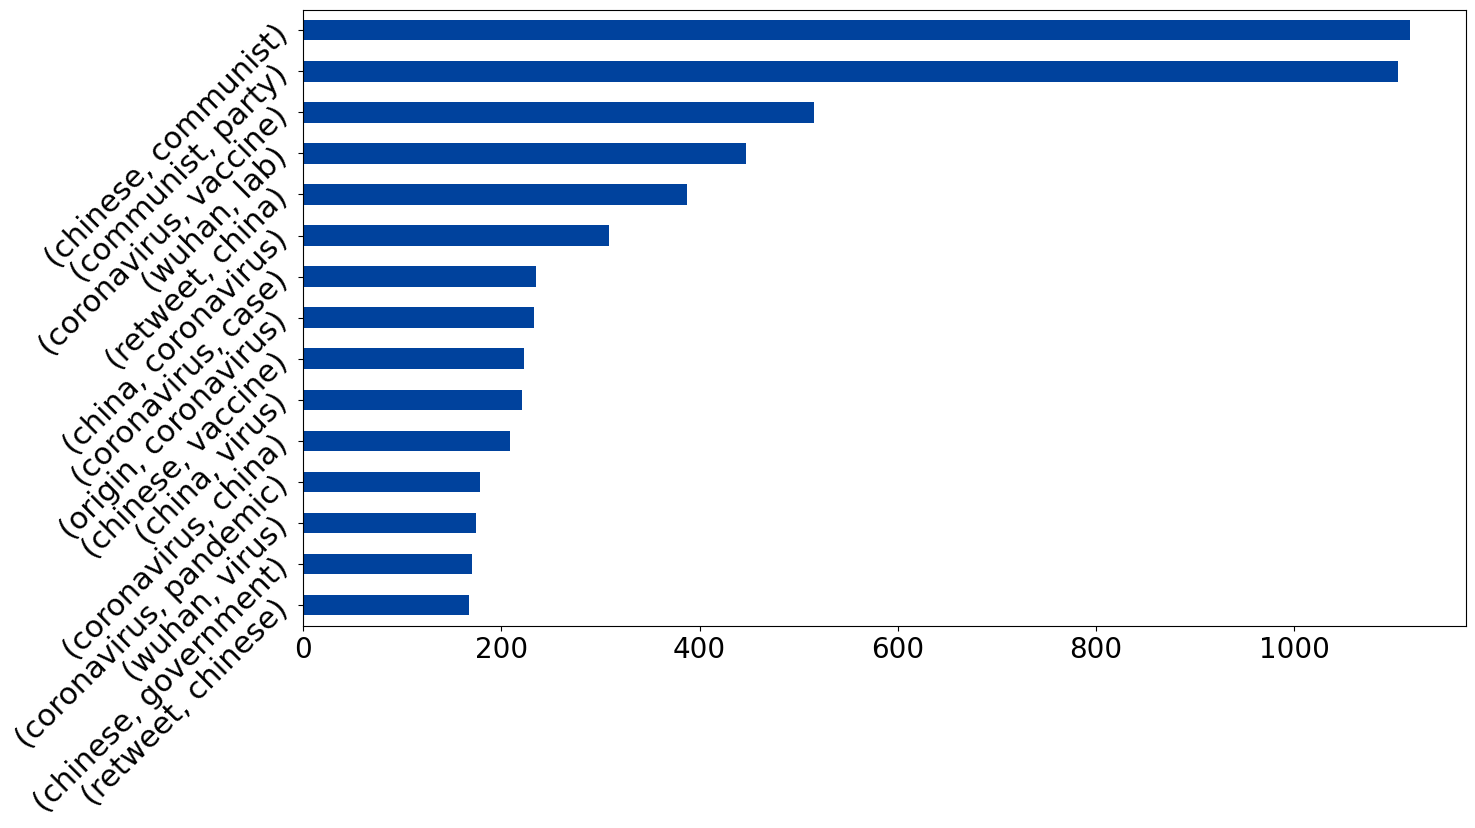

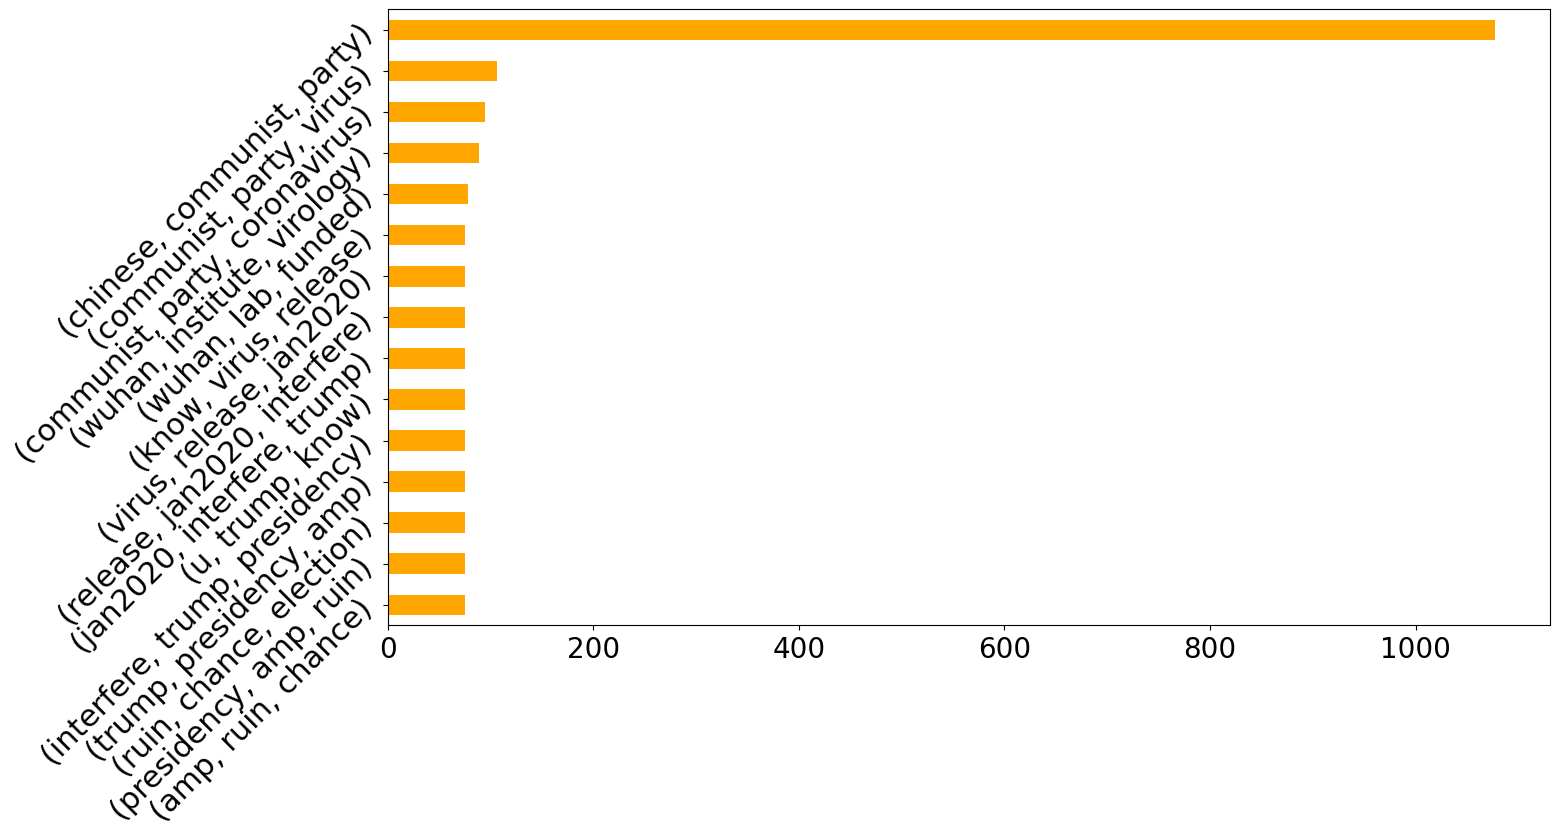

C:\Users\无敌晨晨\AppData\Local\Temp\ipykernel_46848\1034855968.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarterly_data['Tweet'] = quarterly_data['Tweet'].astype(str)


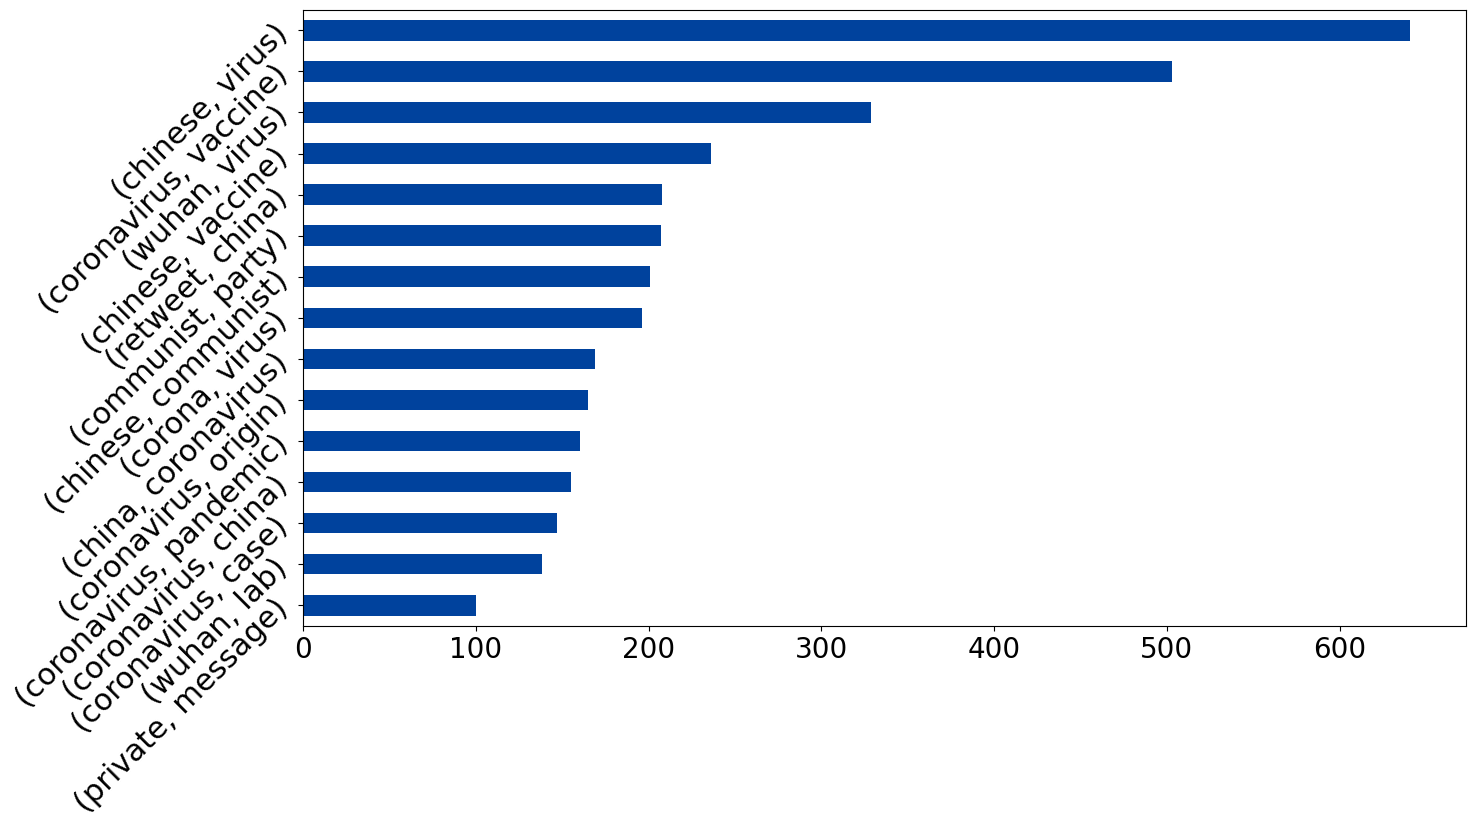

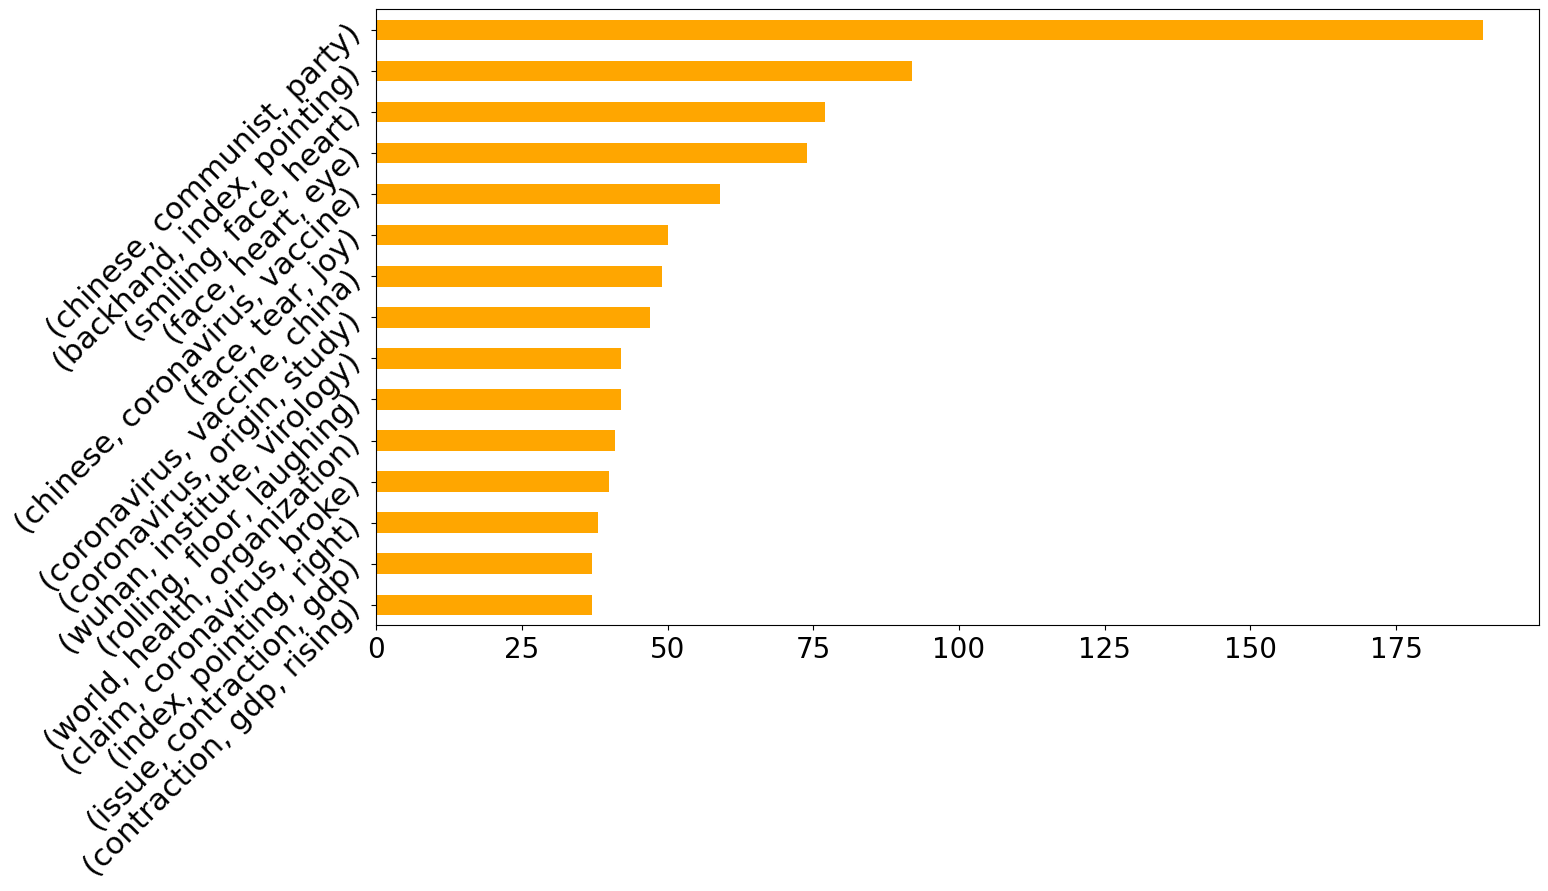

C:\Users\无敌晨晨\AppData\Local\Temp\ipykernel_46848\1034855968.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarterly_data['Tweet'] = quarterly_data['Tweet'].astype(str)


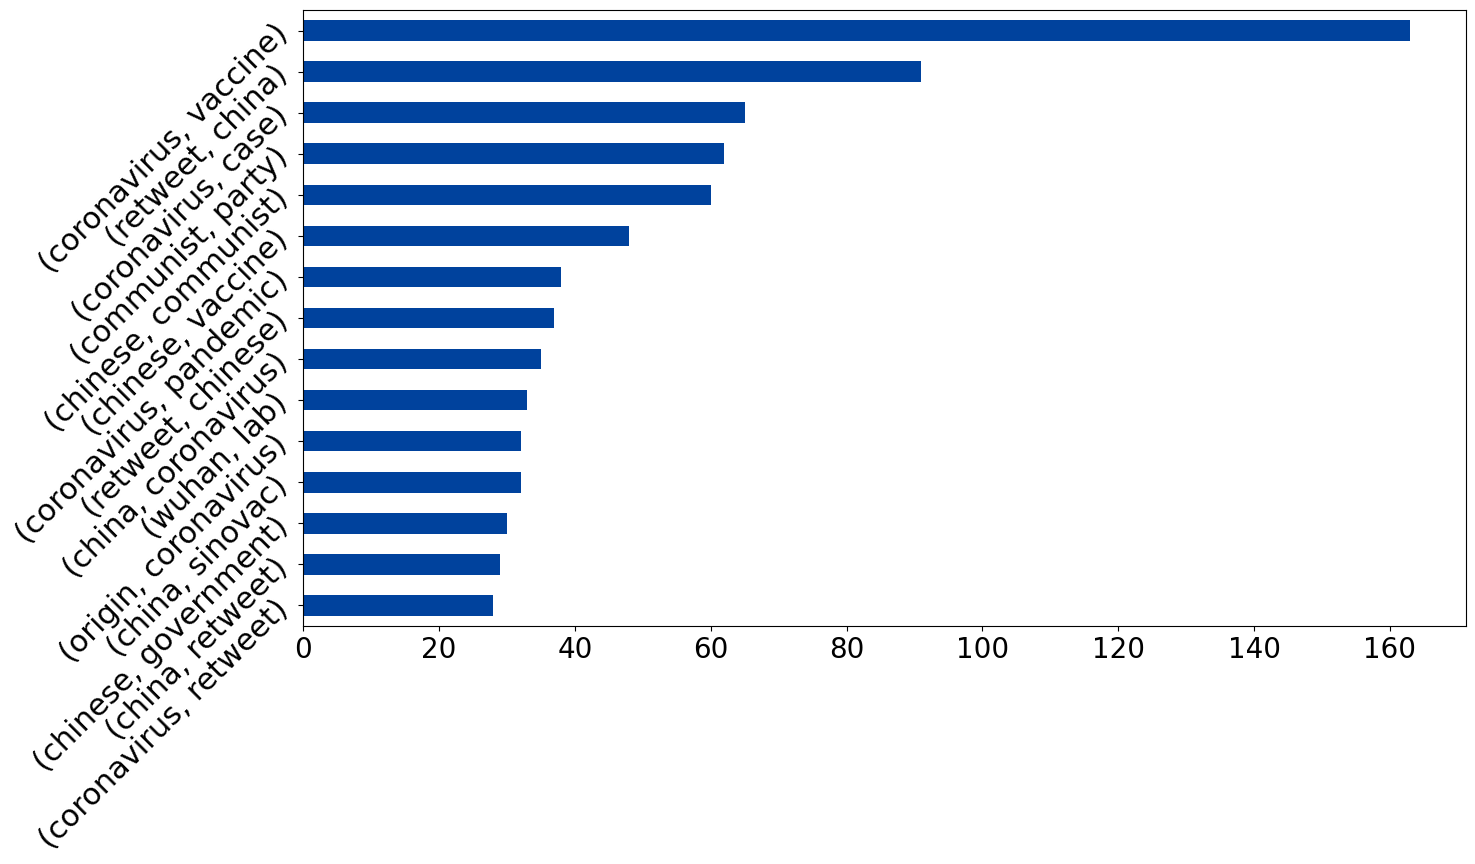

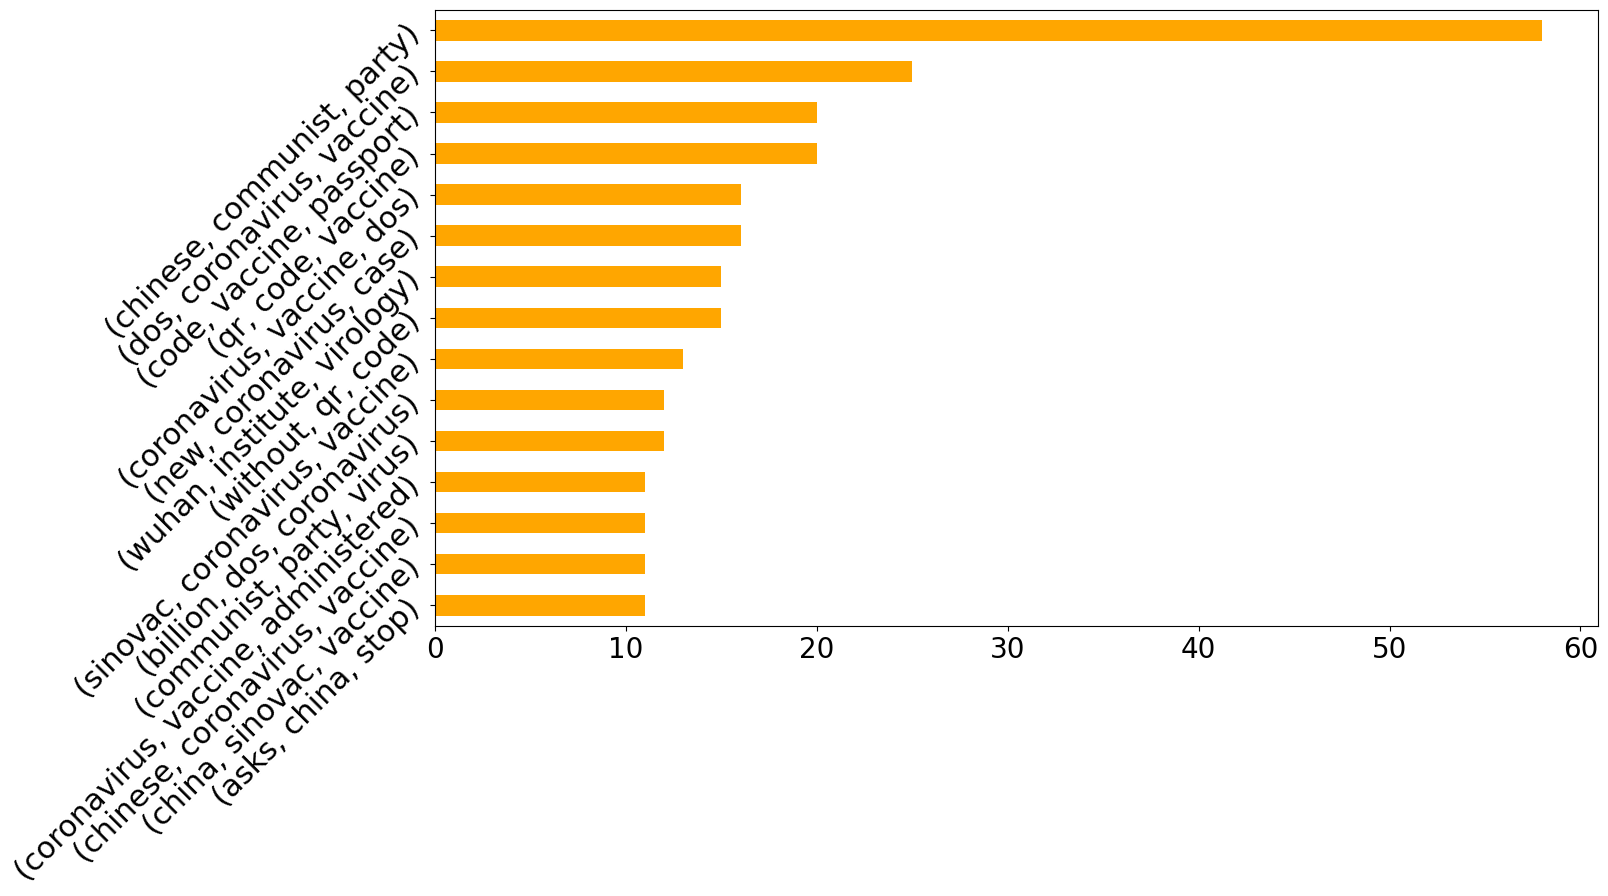

C:\Users\无敌晨晨\AppData\Local\Temp\ipykernel_46848\1034855968.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarterly_data['Tweet'] = quarterly_data['Tweet'].astype(str)


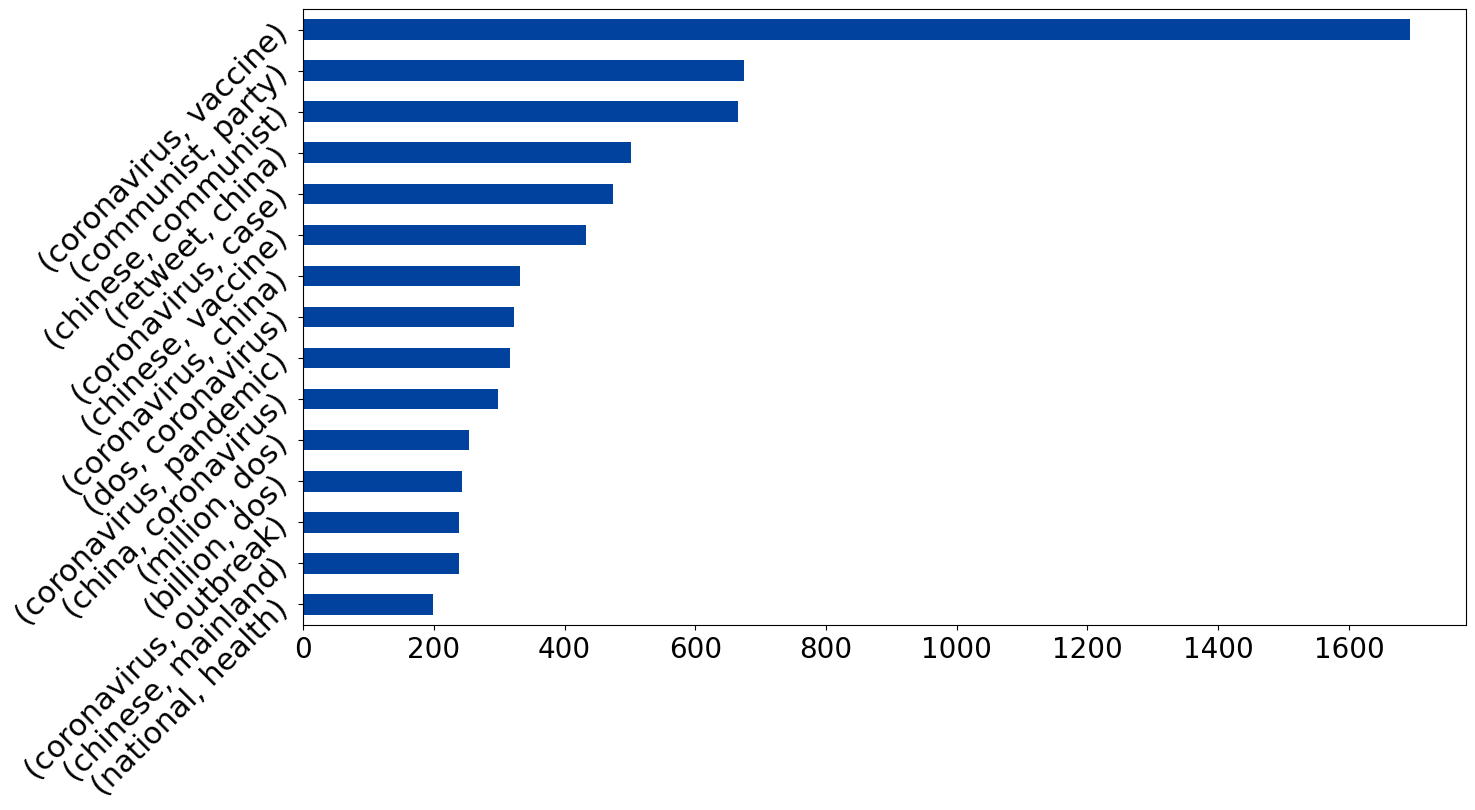

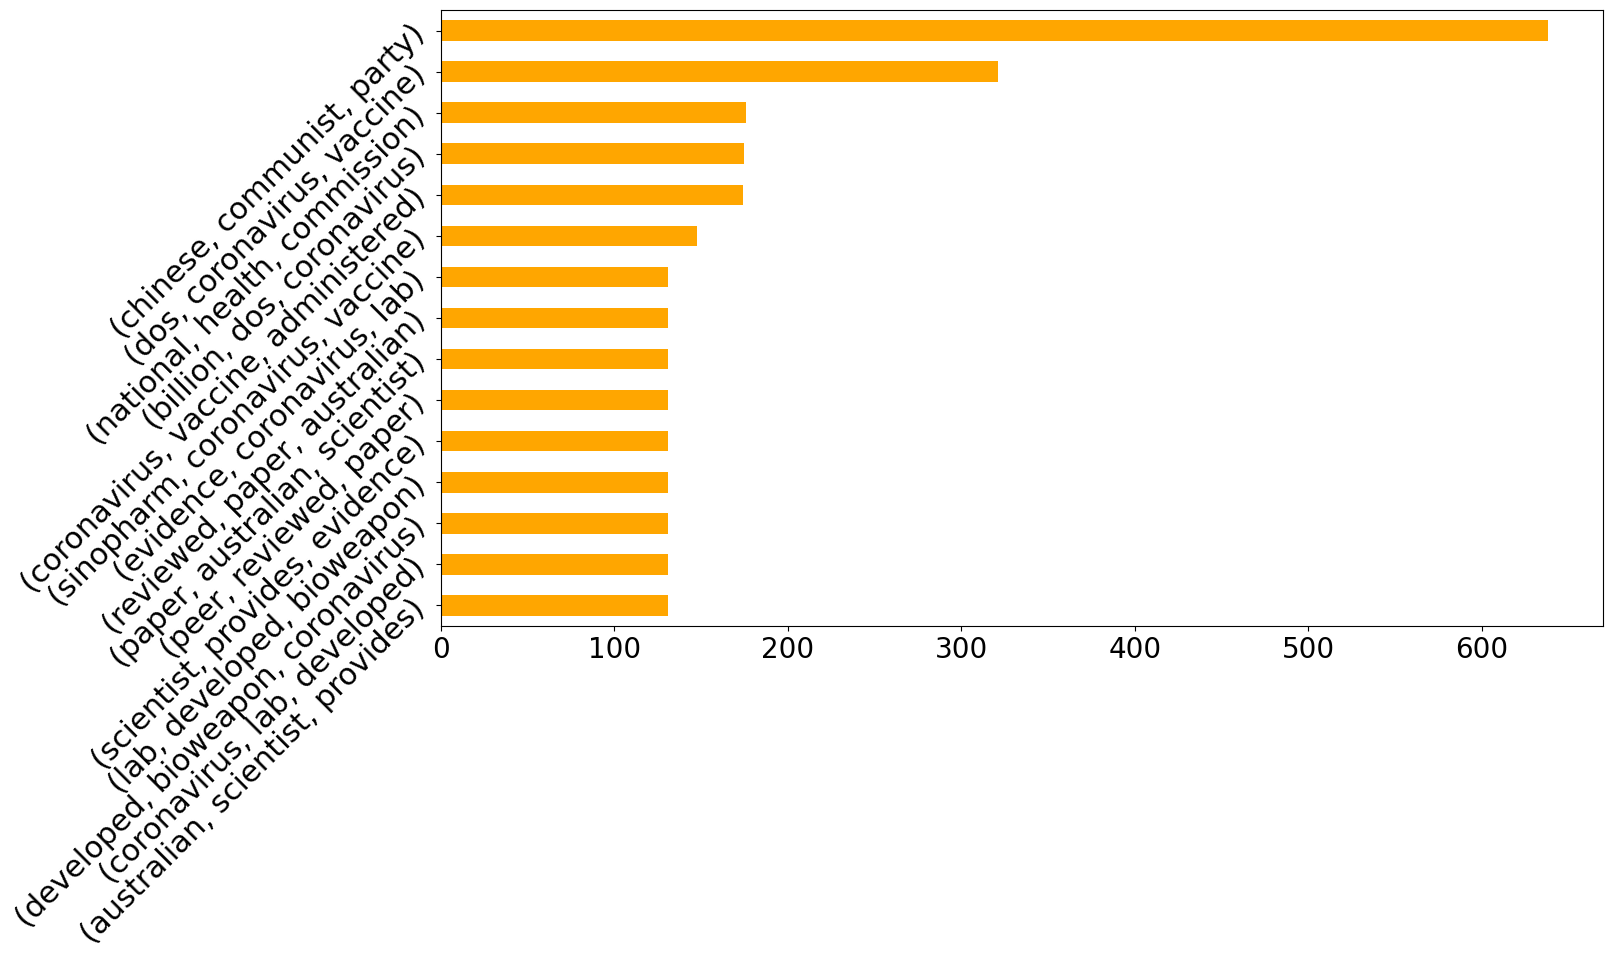

C:\Users\无敌晨晨\AppData\Local\Temp\ipykernel_46848\1034855968.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarterly_data['Tweet'] = quarterly_data['Tweet'].astype(str)


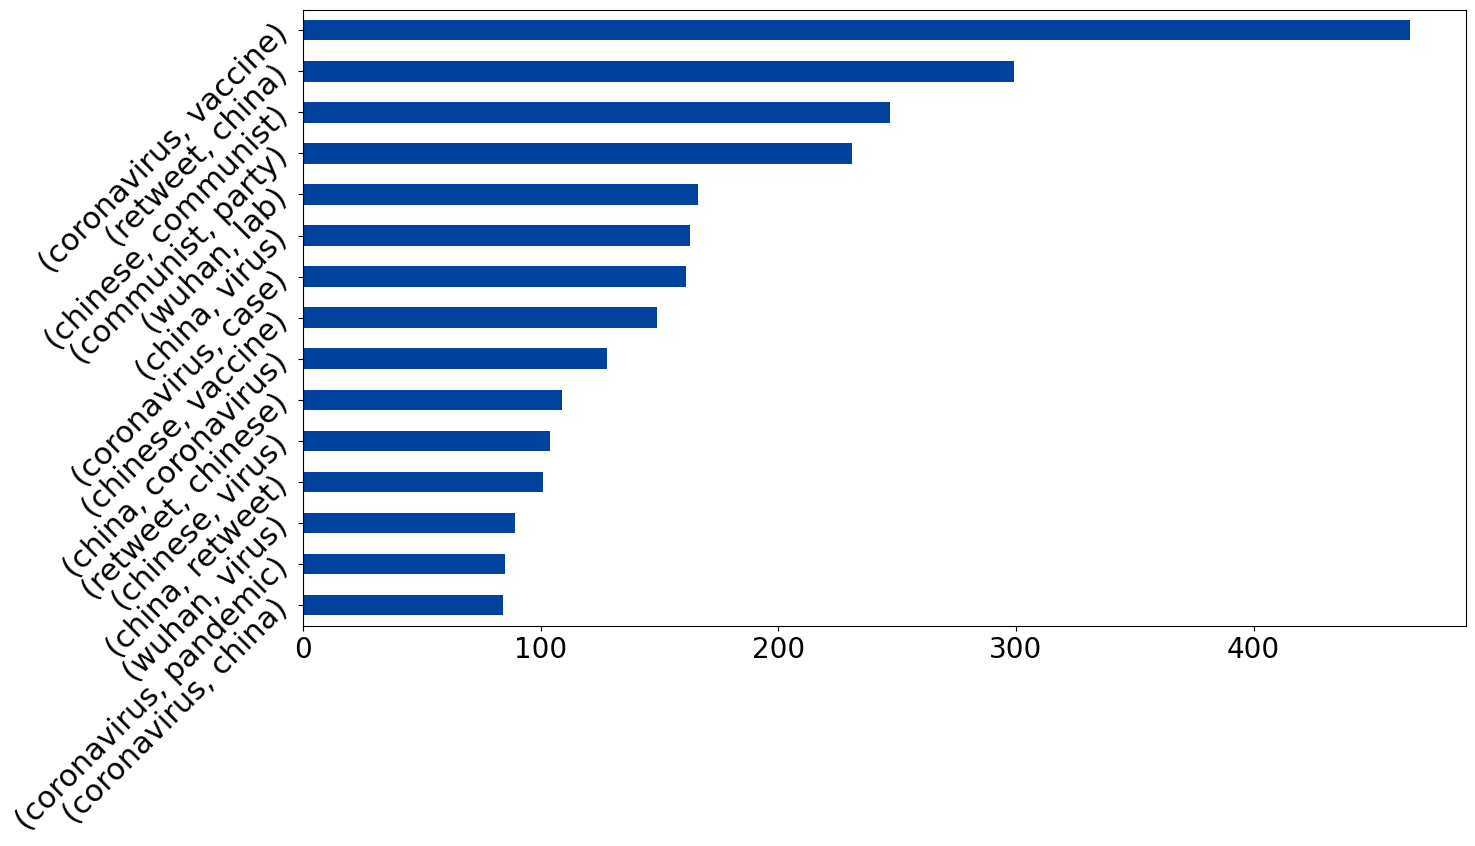

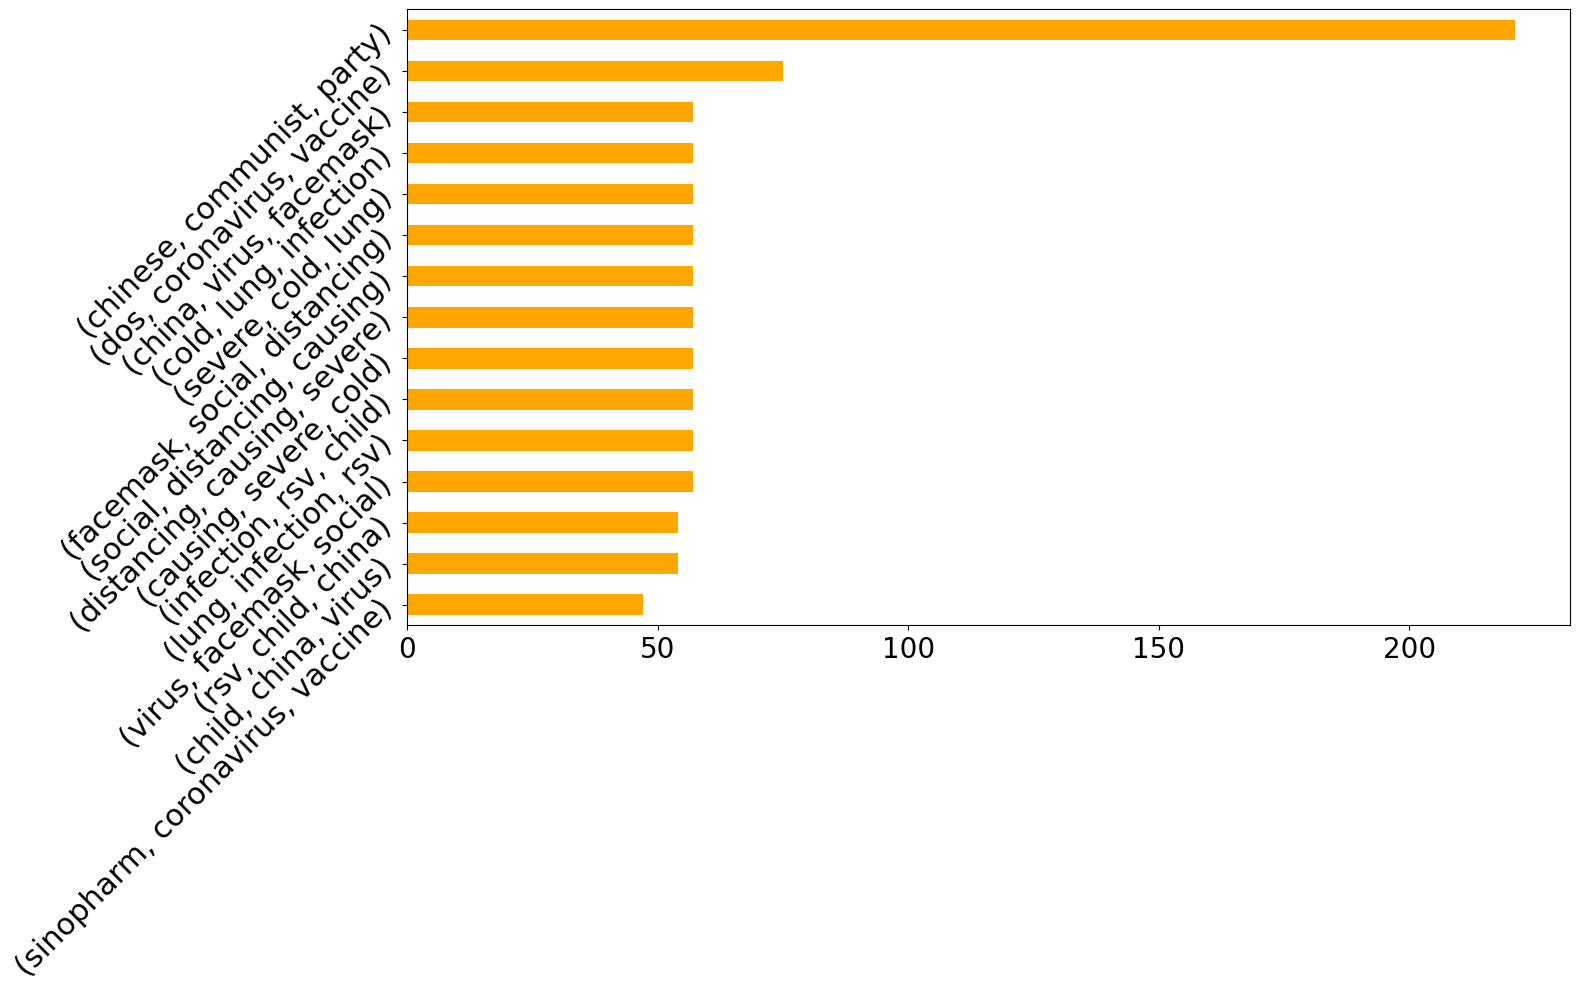

C:\Users\无敌晨晨\AppData\Local\Temp\ipykernel_46848\1034855968.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarterly_data['Tweet'] = quarterly_data['Tweet'].astype(str)


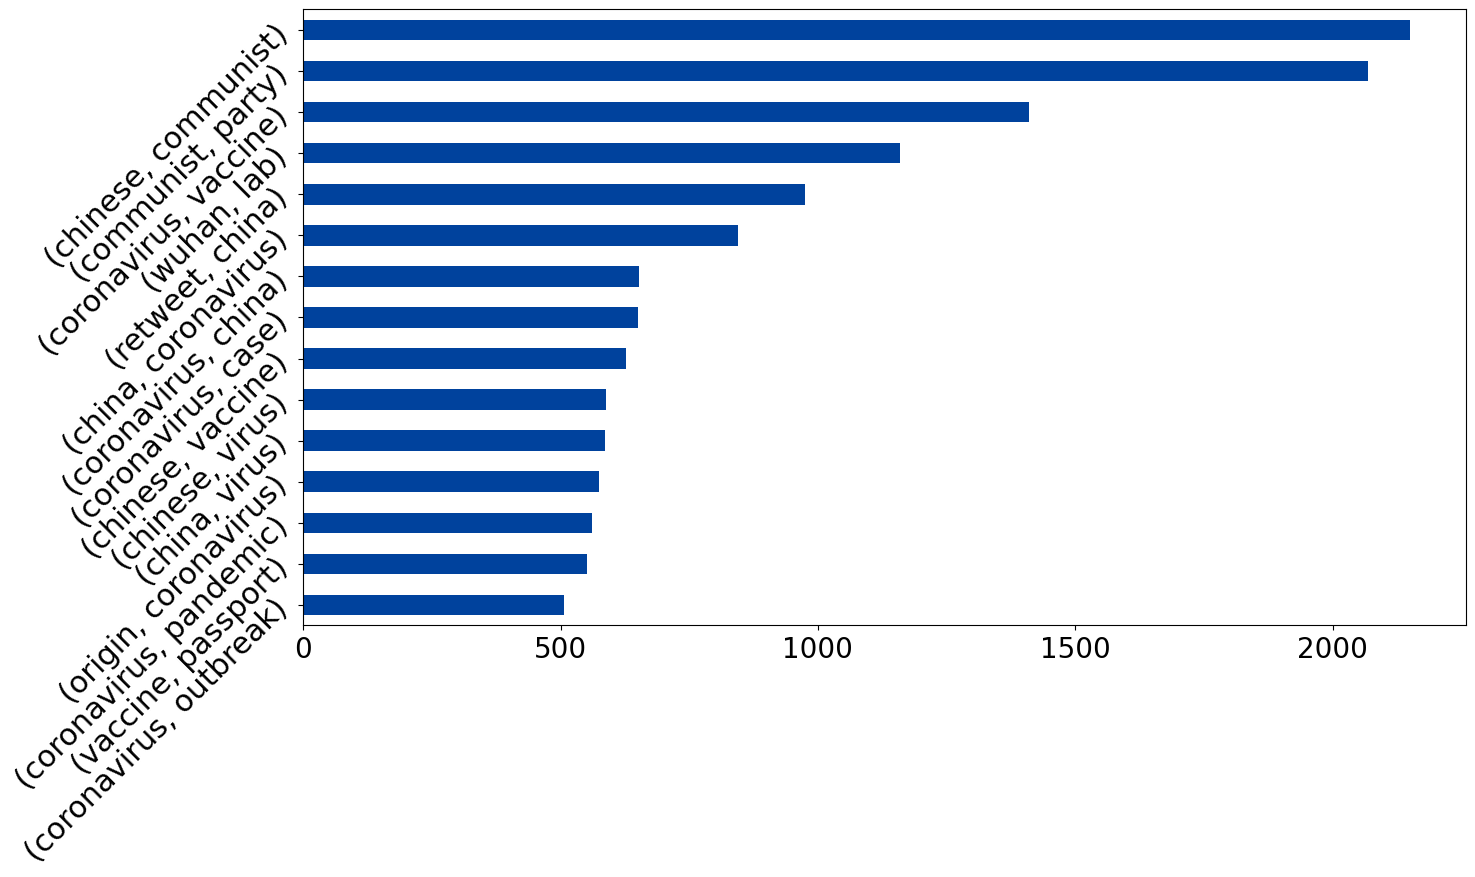

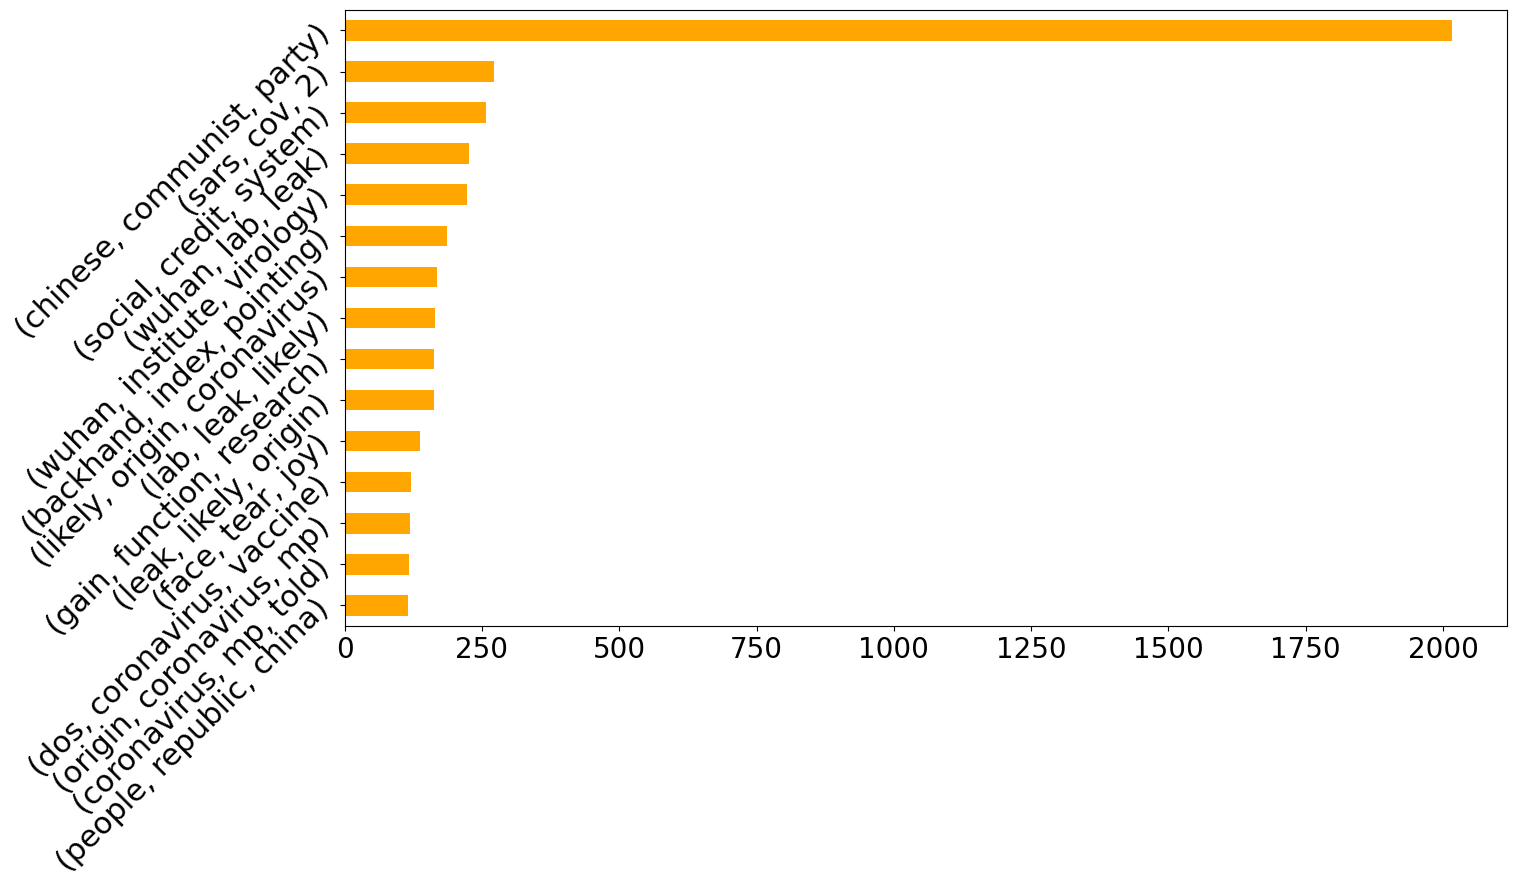

In [20]:
countries = ['Australia', 'India', 'Indonesia', 'Japan', 'Brazil', 'UK']

# Plot n-grams for each country
start_date = '2020-07-01'
end_date = '2022-04-30'
for country in countries:
    country_data = df[df['country'] == country]
    plot_ngrams_for_dataset1(country_data, country, start_date, end_date, n=[2,3], top=15) 

C:\Users\无敌晨晨\AppData\Local\Temp\ipykernel_46848\1034855968.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarterly_data['Tweet'] = quarterly_data['Tweet'].astype(str)


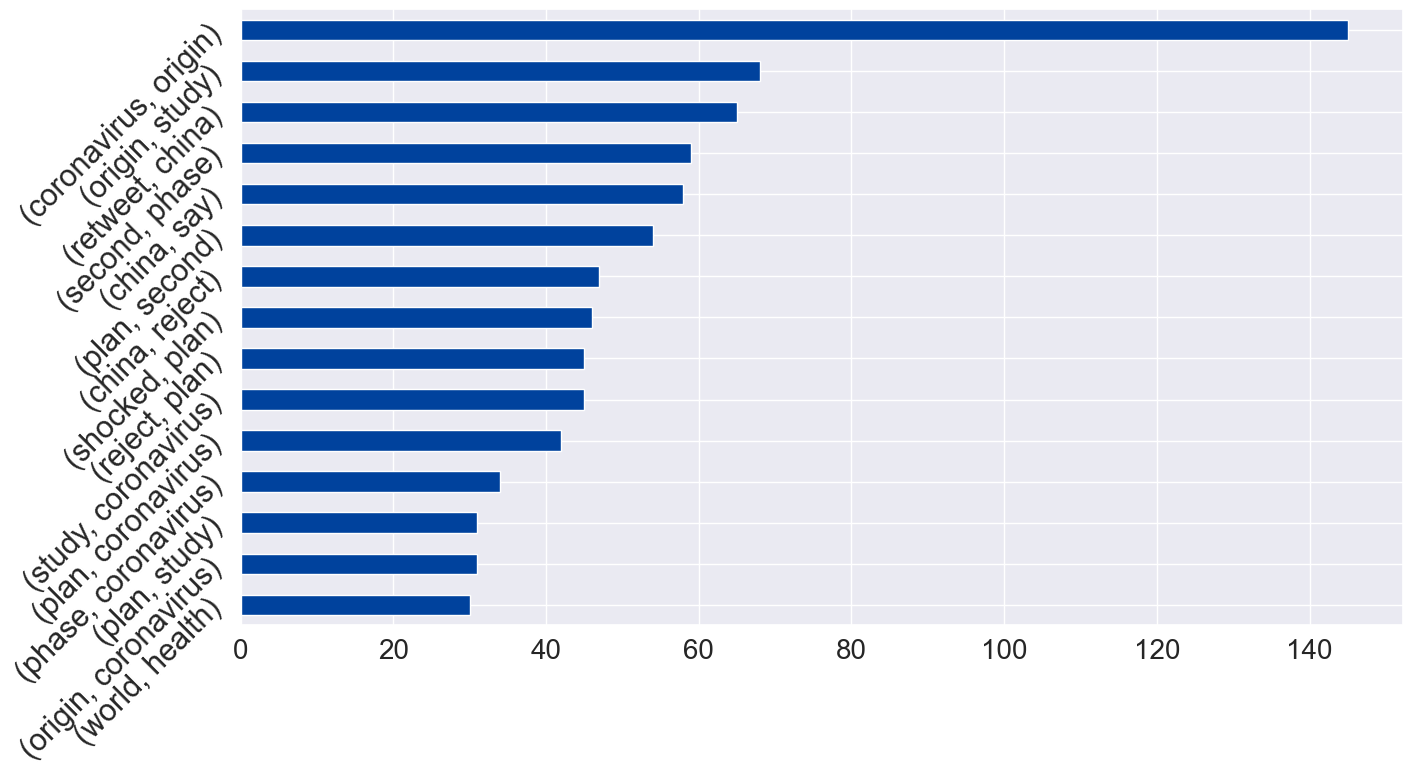

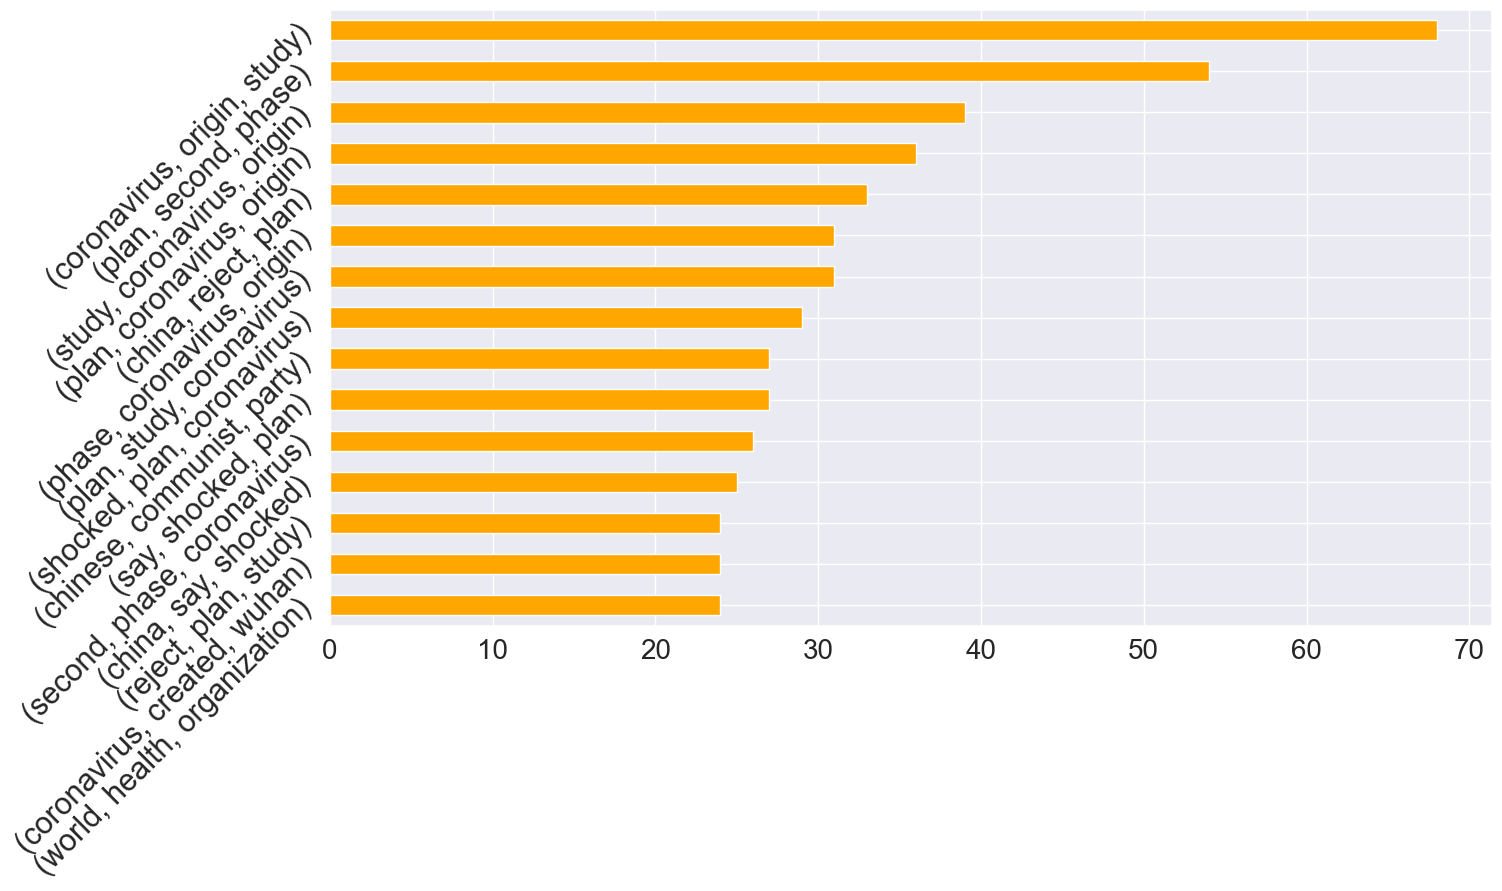

C:\Users\无敌晨晨\AppData\Local\Temp\ipykernel_46848\1034855968.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarterly_data['Tweet'] = quarterly_data['Tweet'].astype(str)


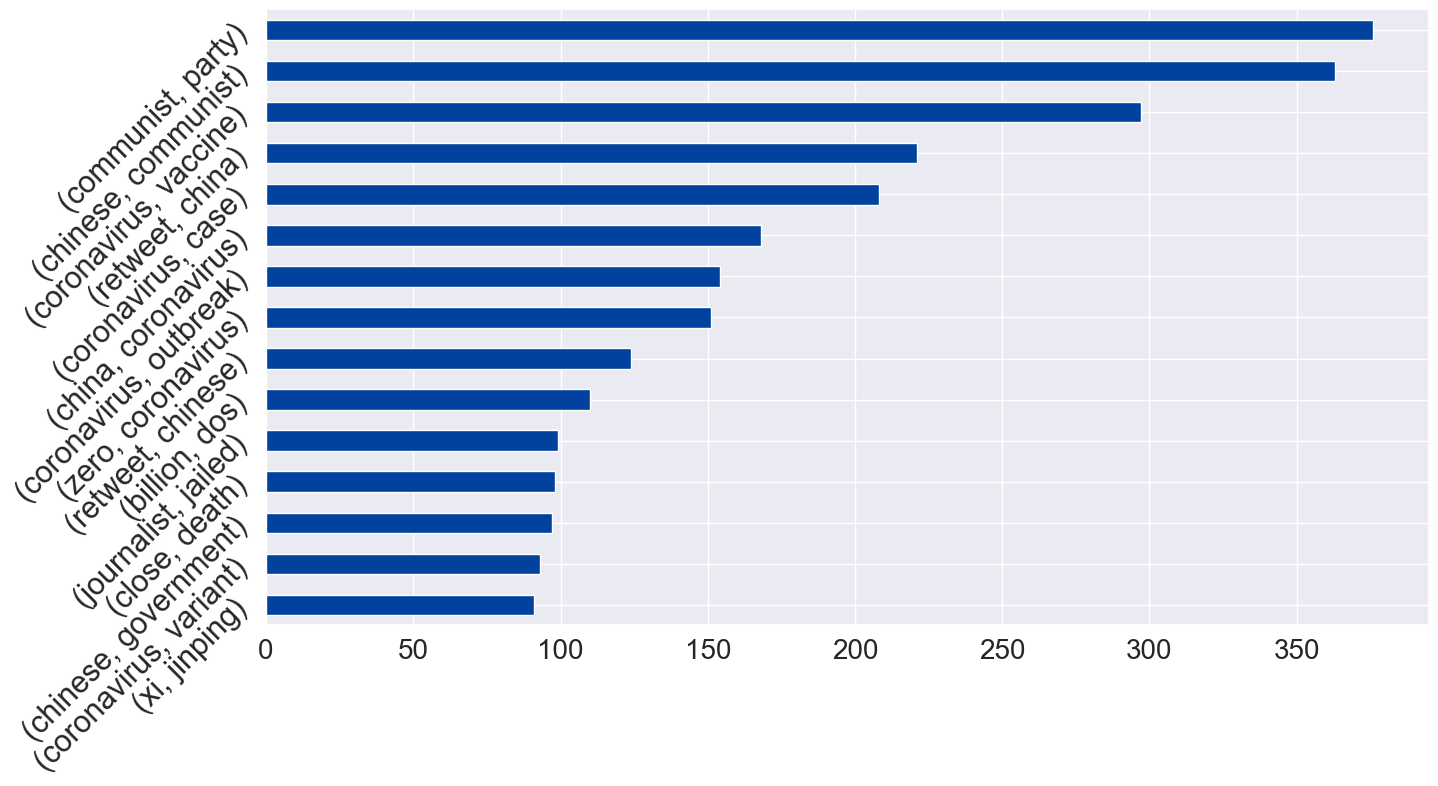

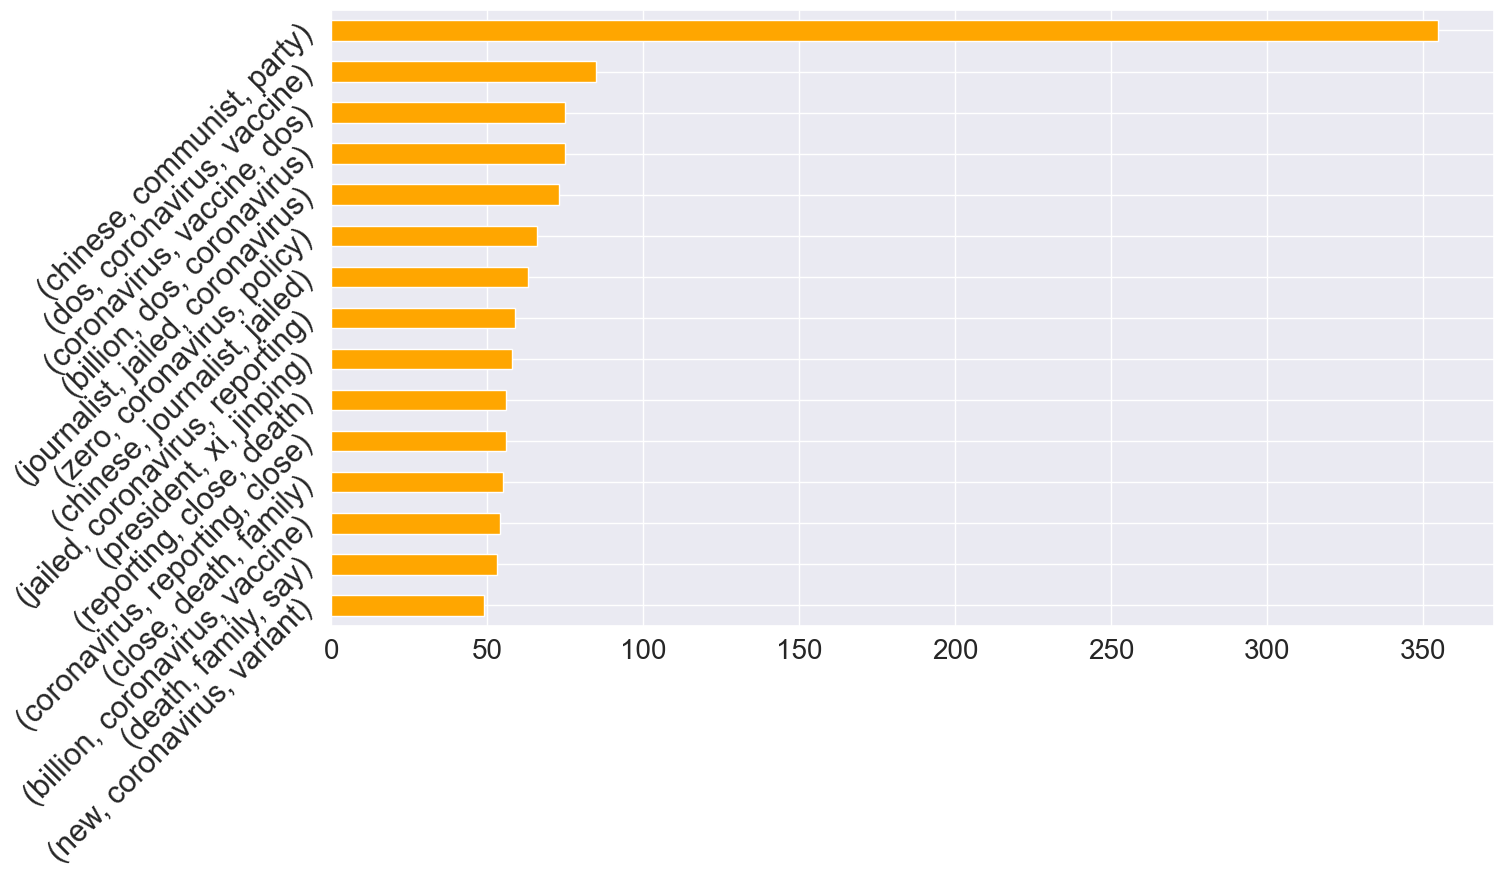

In [57]:
plot_ngrams_for_dataset1(df, 'Overall Dataset', '2021-07-01', '2021-08-01', n=[2, 3], top=15)

plot_ngrams_for_dataset1(df, 'Overall Dataset', '2021-11-01', '2021-12-01', n=[2, 3], top=15)
